Mounting to the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Importing/Installing neccesarry libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Installing rapidfuzz to assign countries to their respective regions.

In [3]:
pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 5.2 MB/s eta 0:00:00


Installing pycountry libraries to handel inconsistent country and mispelled country names,

In [4]:
pip install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 51.0 MB/s eta 0:00:00


In [5]:
pip install pycountry-convert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.8/253.8 kB 2.8 MB/s eta 0:00:00


Importing necessary library and their functions

In [6]:
import pycountry
from rapidfuzz import process, fuzz

Problem 1A

In [7]:
# ======================================================================
# PROBLEM 1A
# ======================================================================

print("\n"+"="*70)
print("PROBLEM 1A")
print("="*70)


PROBLEM 1A


In [8]:
# Loading the data set from the csv file
data = pd.read_csv("/content/drive/MyDrive/Dataset/Human_Development_Index_Dataset.csv",encoding="ISO-8859-1")

In [9]:
# ======================================================================
# TASK 1: EXTRACT LATEST YEAR
# ======================================================================

print("\n"+"="*70)
print("TASK 1: EXTRACT LATEST YEAR")
print("="*70)


TASK 1: EXTRACT LATEST YEAR


In [10]:
'''
browsing the dataset to identify the correct column name
where years are being stored
'''
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                       6798 non-null   object 
 2   country                    6798 non-null   object 
 3   year                       6798 non-null   int64  
 4   hdi                        6171 non-null   float64
 5   life_expectancy            6798 non-null   float64
 6   pop_millions               6798 non-null   float64
 7   hdi_f                      5014 non-null   float64
 8   hdi_m                      5014 non-null   float64
 9   life_expec_f               6798 non-null   float64
 10  life_expec_m               6798 non-null   float64
 11  expec_yr_school            6550 non-null   float64
 12  expec_yr_school_f          6270 non-null   float64
 13  expec_yr_school_m          6270 non-null   float

In [11]:
'''
Identify unique years in the dataset.
'''
unique_data = data["year"].unique()
print("the unique years in the dataset are :\n", unique_data)

the unique years in the dataset are :
 [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [12]:
'''
Filterint the dataset to include only observations from the year 2022
and then save the filtered dataframe as hdi_2022_df
'''
hdi_2022_df = data[data["year"] == 2022]
hdi_2022_df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


In [13]:
# ======================================================================
# TASK 2: DATA EXPLORATION
# ======================================================================

print("\n"+"="*70)
print("TASK 2: DATA EXPLORATION")
print("="*70)


TASK 2: DATA EXPLORATION


In [14]:
# Display the first 10 rows of the 2022 dataset.

print(f"The first 10 values of hdi_2022_df are as follow:\n")
hdi_2022_df.head(10)

The first 10 values of hdi_2022_df are as follow:



,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [15]:
# Count the number of rows and columns.

rows,columns = hdi_2022_df.shape

print(f"\nthe numbers of rows in unique set hdi_2022_df is:\n{rows}")
print(f"the numbers of columns in unique set hdi_2022_df is:\n{columns}")



the numbers of rows in unique set hdi_2022_df is:
206
the numbers of columns in unique set hdi_2022_df is:
30


In [16]:
# List all column names and their data types.

column_types = hdi_2022_df.dtypes
print(f"The list of the column and their types in hdi_2022_df are as follow:\n{column_types}")

The list of the column and their types in hdi_2022_df are as follow:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_

In [17]:
# ======================================================================
# Task 3: Missing Values and Data Cleaning
# ======================================================================

print("\n"+"="*70)
print("Task 3: Missing Values and Data Cleaning")
print("="*70)


Task 3: Missing Values and Data Cleaning


In [18]:
'''
Check for missing values in each column and
reporting their total counts.
'''
missing_info = hdi_2022_df.isnull().sum()
print(f"missing values in each column their total counts are as follow: \n{missing_info}")

missing values in each column their total counts are as follow: 
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_foo

In [19]:
'''
Inspect dataset for: numeric columns stored as text,
'''
object_columns = hdi_2022_df.select_dtypes(include="object").columns
no_num_obj_col = 0
for col in object_columns:
  try:
    hdi_2022_df[col].astype(float)
    print(f"{col} had integer values. {col} values converted to integer")
    no_num_obj_col +=1
  except:
    print(f"{col} has object value, no conversion needed")
print("\nnumber of numberic columns stored as object: ", no_num_obj_col)


iso3 has object value, no conversion needed
country has object value, no conversion needed

number of numberic columns stored as object:  0


In [20]:
'''
handeling missing value for column with 10 or more missing values
while dropping rows with minimal missing values as they don't have
sifficant impact on the dataset
'''
for column in hdi_2022_df.columns:

  if missing_info[column] > 10:

    if hdi_2022_df[column].dtypes in ["float64","int64"]:
      # for columns of datatype int and float we substitute the missing value with overall mean of the column
      hdi_2022_df[column]=hdi_2022_df[column].fillna(hdi_2022_df[column].mean())
    elif hdi_2022_df[column].dtypes == "object":
      # for columns of datatype object we substitute the missing value with mode of the column
      hdi_2022_df[column]=hdi_2022_df[column].fillna(hdi_2022_df[column].mode())
  else:
    # for column less than 10 values missing , can be considered as negligible and is unlikely to significantly affect the analysis, so we can drop the column.
    hdi_2022_df = hdi_2022_df.dropna(subset=[column])

In [21]:
# checking if there are any missing values left
print(hdi_2022_df.isnull().sum())

Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64


In [22]:
'''
  for inconsistent or misspelled country name, first observing the unique values
  to identify inconsistent country name
'''

print(hdi_2022_df["country"].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' '

In [23]:
'''
  manually identifying obvious inconsistent country names and droping their respective columns
'''

# storing inconsistent coutry names obtain via observation in a list
drop_values = ['Very high human development', 'High human development',
 'Medium human development' ,'Low human development', 'Arab States',
 'East Asia and the Pacific', 'Europe and Central Asia',
 'Latin America and the Caribbean' ,'South Asia' ,'Sub-Saharan Africa',
 'World']

# droping tha column that include the country names from the drop value list
hdi_2022_df.drop(hdi_2022_df[hdi_2022_df['country'].isin(drop_values)].index, inplace=True)

# viewing remaining countries
print(hdi_2022_df["country"].unique())


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' '

In [24]:
'''
  using pycountry library to further check for any further inconsistent or misspelled country names
  because even after manually identifying obvious inconsistent names,
  there could still be subtle misspellings, alternate spellings, or variations
  of country names in the datase
'''

# storing all the country names available in pycountry library in a list
country_list = [ c.name for c in pycountry.countries]

# an empty list to later add countries with inconsistent or misspelled countries
drop_country = []

# to store the count of valid country names
count = 0

# looping through the country values in this dataset
for countries in hdi_2022_df["country"]:

  try:
    # Lookup each country in 'countries' using pycountry to ensure names are consistent and correctly spelled
    pycountry.countries.lookup(countries)

    # incremeant count if the country name is valid
    count +=1
  except LookupError as e:
    # If pycountry cannot find a match, useing fuzzy matching to compare 'countries' with 'country_list'
    # suggets a match(valid country name) and its score of similarity with misspelled country name from data set
    match, score, _ = process.extractOne(
        countries,
        country_list,
        scorer=fuzz.WRatio #computes the similarity score between country name given with the values in the country list
    )

    # if score is ledd than 80 store the ocuntry name to drop list
    if score < 80:
        drop_country.append(countries)

# get total no of countries avaiable in dataset
rows = len(hdi_2022_df["country"].unique())

# if count of valid country name is less than total no of rows
if (count < rows):
  # drop the rows with country names from drop_country list
  hdi_2022_df = hdi_2022_df[~hdi_2022_df['country'].isin(drop_country)]
else:
  # there are no misspelled country names
  print("no misspelled country values.")

In [25]:
# checking if there exists any duplicated rows
duplicated_rows= hdi_2022_df.duplicated().sum()
print("number of duplicated rows:\n",duplicated_rows)

# Incase there were any duplicated rows droping them
if (duplicated_rows > 0):
  hdi_2022_df.drop_duplicates()

number of duplicated rows:
 0


In [26]:
# checking for any special characters (e.g., “–”) representing missing data.
print((hdi_2022_df == "-").sum())

Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64


In our above inspection we have observed that:
1.   there were not any object columns in need of data conversion
2.   many float type columns had missing data and none of the object types had any missing data
3.   there weren't any duplicated rows
4.   there weren't any special character representing missing data

Cleaning steps taken:


1.   in case any duplicates were not duplicated , drop_duplicates was used to insure clean dataset
2.   for missing datas of column having 10  or more missing datas,


  a.   with float data type were filled with overall mean of the column

  b.   with object data types were filled with highedt mode value.

3.  for missing datas of column having less than 10 midding datas, respective rows were droped entirely.



In [27]:
# ======================================================================
# Task 4: Basic Statistics
# ======================================================================

print("\n"+"="*70)


print("Task 4: Basic Statistics")
print("="*70)


Task 4: Basic Statistics


In [28]:
'''
Compute the mean, median, and standard deviation of HDI
for the year 2022.
'''
mean_HDI_2022 = hdi_2022_df["hdi"].mean() #gives mean of the column
median_HDI_2022 = hdi_2022_df["hdi"].median() #gives median of the column
std_HDI_2022 = hdi_2022_df["hdi"].std() #gives standard deviation of the column

In [29]:
# identify the country with the highest and Lowest HDI in 2022
max_HDI_2022 = hdi_2022_df["hdi"].max() #gives max value of a column
min_HDI_2022 = hdi_2022_df["hdi"].min() #gives min value of a column

# getting the country name with highest and lowest HDI in 2022
max_HDI_country = hdi_2022_df.loc[hdi_2022_df["hdi"] == max_HDI_2022, ["country","hdi"]]
min_HDI_country = hdi_2022_df.loc[hdi_2022_df["hdi"] == min_HDI_2022,["country","hdi"]]


In [30]:
print("\nmean of HDI for the year 2022 is:\n",mean_HDI_2022)
print("\nmedian of HDI for the year 2022 is:\n",median_HDI_2022)
print("\nstandard deviation of HDI for the year 2022 is:\n",std_HDI_2022)
print("\nthe country with highest HDI for the year 2022 is:\n", max_HDI_country.iloc[0,0], ":",max_HDI_country.iloc[0,1])
print("\nthe country with lowest HDI for the year 2022 is:\n", min_HDI_country.iloc[0,0],":",min_HDI_country.iloc[0,1])


mean of HDI for the year 2022 is:
 0.7218052631578947

median of HDI for the year 2022 is:
 0.7395

standard deviation of HDI for the year 2022 is:
 0.1551261612303951

the country with highest HDI for the year 2022 is:
 Switzerland : 0.967

the country with lowest HDI for the year 2022 is:
 Somalia : 0.38


In [31]:
# ======================================================================
# Task 5: Filtering and Sorting
# ======================================================================

print("\n"+"="*70)
print("Task 5: Filtering and Sorting")
print("="*70)


Task 5: Filtering and Sorting


In [32]:
# filtering countries with HDI {"hdi"} greater than 0.800
gross_inc_percap = hdi_2022_df[hdi_2022_df["hdi"] > 0.800]

In [33]:
# and storing them in gross_inc_percap
gross_inc_percap =gross_inc_percap.sort_values(by="gross_inc_percap",ascending = False)

In [34]:
# displaying the top 10 countries with HDI {"hdi"} greater than 0.800
gross_inc_percap[["country","hdi","gross_inc_percap"]].head(10)

,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
1550,Denmark,0.952,62018.95694


In [35]:
# ======================================================================
# Task 6: Adding HdI Category Column
# ======================================================================

print("\n"+"="*70)
print("Task 6: Adding HdI Category Column")
print("="*70)


Task 6: Adding HdI Category Column


Create a new column HDI Category that classifies each country into
one of the four official Human Development Index groups.

In [36]:
# creating bins and labels as per the threshold set by United National Developmet
bins = [0,0.55,0.70,0.80,1.0] #since the lowest hdi is 0.3 and highest is around 0.9
labels = ["Low","Medium","High","Very high"]

In [37]:
# creating a new column HDI_Category that classifies the countries based on the thresholds.
hdi_2022_df["HDI_Category"] = pd.cut(hdi_2022_df["hdi"],bins=bins,labels=labels)


In [38]:
# verifying if the data set has the column HDI_Category
hdi_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 32 to 6434
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Unnamed: 0                 190 non-null    int64   
 1   iso3                       190 non-null    object  
 2   country                    190 non-null    object  
 3   year                       190 non-null    int64   
 4   hdi                        190 non-null    float64 
 5   life_expectancy            190 non-null    float64 
 6   pop_millions               190 non-null    float64 
 7   hdi_f                      190 non-null    float64 
 8   hdi_m                      190 non-null    float64 
 9   life_expec_f               190 non-null    float64 
 10  life_expec_m               190 non-null    float64 
 11  expec_yr_school            190 non-null    float64 
 12  expec_yr_school_f          190 non-null    float64 
 13  expec_yr_school_m          190 non-nul

In [39]:
# verify if categories were assigned as per the threshold defined by the United Nations Development:
hdi_2022_df[['country','hdi','HDI_Category']].head()

,country,hdi,HDI_Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very high
164,Angola,0.591,Medium


In [40]:
hdi_category_value_count = hdi_2022_df["HDI_Category"].value_counts()
print("the value count for each hdi category is :\n",hdi_category_value_count)


the value count for each hdi category is :
 HDI_Category
Very high    67
High         47
Medium       41
Low          35
Name: count, dtype: int64


Here the value counts indicate that all the rows were assigned with a hdi category.

It is observed that the categories have been assigned as per the threshold, we can move on to creating a new file for the file dataframe.

In [41]:
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

In [42]:
# ======================================================================
# Problem 1B: HDI Visualization and Trend Analysis (2020 – 2022)
# ======================================================================

print("\n"+"="*70)
print("Problem 1B: HDI Visualization and Trend Analysis (2020 – 2022)")
print("="*70)


Problem 1B: HDI Visualization and Trend Analysis (2020 – 2022)


In [43]:
# ======================================================================
# Task 1: Data Extraction and Saving
# ======================================================================

print("\n"+"="*70)
print("Task 1: Data Extraction and Saving")
print("="*70)


Task 1: Data Extraction and Saving


In [44]:
# Filter the dataset to include only the years 2020, 2021, and 2022.
filtered_data = data[data["year"].isin([2020, 2021, 2022])]

In [45]:
# Save the filtered dataset as HDI problem1B.csv.
filtered_data.to_csv("HDI_problem1B.csv", index=False)

In [46]:
# Use this cleaned dataset for all subsequent tasks in Problem 1B.
HDI_1B_df = pd.read_csv("HDI_problem1B.csv")

In [47]:
# ======================================================================
# Task 2: Data Cleaning
# ======================================================================

print("\n"+"="*70)
print("Task 2: Data Cleaning")
print("="*70)


Task 2: Data Cleaning


In [48]:
#Check for missing values in the following essential columns:
needed_columns = ["hdi","country","year"]
missing_values = HDI_1B_df[needed_columns].isnull()
print("Missing values in essential columns:\n", missing_values.sum())

Missing values in essential columns:
 hdi        8
country    0
year       0
dtype: int64


In [49]:
# since only hdi has missing values handleing missing values for float datatype
for column in HDI_1B_df.columns:
  # identifying the null row
  if missing_info[column]:
    # handeling msising values for only float type , since only hdi (float type) column has null values
    if HDI_1B_df[column].dtypes in ["float64","int64"]:
      # for ]columns of datatype int and float we substitute the missing value with overall mean of the column
      HDI_1B_df[column]=HDI_1B_df[column].fillna(HDI_1B_df[column].mean())

In [50]:
# dropping nan values in hdi if any missed previously
HDI_1B_df.dropna(subset=["hdi"])

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,31,AFG,Afghanistan,2020,0.488,62.575000,38.972231,0.381373,0.548741,65.432000,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.500000,66.840000,0.305040,1.555400
1,32,AFG,Afghanistan,2021,0.473,61.982000,40.099462,0.379129,0.528559,65.279000,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.330000,77.090000,0.306318,1.235100
2,33,AFG,Afghanistan,2022,0.462,62.879000,41.128771,0.332443,0.534145,66.213000,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900
3,64,ALB,Albania,2020,0.784,76.989000,2.866849,0.775404,0.793220,79.676000,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.450000,68.910000,1.750668,10.470400
4,65,ALB,Albania,2021,0.785,76.463000,2.854710,0.777866,0.792942,79.173000,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.586500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6764,ZZJ.SSA,Sub-Saharan Africa,2021,0.546,60.112445,1118.480023,0.521533,0.571211,62.124100,...,0.913,0.567,31.006847,42.166091,25.715752,74.284248,62.229157,75.015130,0.726869,3.855841
614,6765,ZZJ.SSA,Sub-Saharan Africa,2022,0.549,60.639700,1146.742474,0.525081,0.573585,62.621953,...,0.915,0.565,30.864417,42.045967,26.360216,73.639784,63.919192,76.428981,0.720271,3.786977
615,6796,ZZK.WORLD,World,2020,0.736,72.257355,7806.602793,0.715597,0.753310,74.857415,...,0.950,0.463,64.385236,71.331807,25.370844,74.629156,45.457446,72.687775,4.336829,12.178989
616,6797,ZZK.WORLD,World,2021,0.735,71.365524,7874.877719,0.714806,0.751553,73.978883,...,0.951,0.463,64.325131,71.182639,25.913010,74.086990,46.169728,73.349464,4.520335,12.456034


In [51]:
# verufying if all mssing values has been addressed with
missing_values = HDI_1B_df[needed_columns].isna().sum()
print("Missing values in essential columns:\n", missing_values)

Missing values in essential columns:
 hdi        0
country    0
year       0
dtype: int64


In [52]:
# Find duplicates
duplicate_rows = HDI_1B_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Remove duplicates
if (duplicated_rows > 0 ):
  HDI_1B_df = HDI_1B_df.drop_duplicates()


Number of duplicate rows: 0


In [53]:
# getting Unique countries
unique_countries = HDI_1B_df["country"].unique()
print("Unique countries:", unique_countries)

Unique countries: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Ira

In [54]:
'''
  - manually identifying obvious inconsistent country names and droping their respective columns
  - using pycountry library to further check for any further inconsistent or misspelled country names
    because even after manually identifying obvious inconsistent names,
    there could still be subtle misspellings, alternate spellings, or variations
    of country names in the datase
'''

# storing inconsistent coutry names obtain via observation in a list
drop_values = ['Very high human development', 'High human development',
'Medium human development' ,'Low human development', 'Arab States',
'East Asia and the Pacific', 'Europe and Central Asia',
'Latin America and the Caribbean' ,'South Asia' ,'Sub-Saharan Africa',
'World']

# droping tha column that include the country names from the drop value list
HDI_1B_df = HDI_1B_df.drop(HDI_1B_df[HDI_1B_df['country'].isin(drop_values)].index)

# storing all the country names available in pycountry library in a list
country_list = [c.name for c in pycountry.countries]

# an empty list to later add countries with inconsistent or misspelled countries
drop_country = []

# to store the count of valid country names
count = 0

for i, country in HDI_1B_df["country"].items():
    country_name = country.strip()
    try:
        # Lookup each country in 'countries' using pycountry to ensure names are consistent and correctly spelled
        pycountry.countries.lookup(country_name)

        # incremeant count if the country name is valid
        count += 1
    except LookupError:
        # If pycountry cannot find a match, useing fuzzy matching to compare 'countries' with 'country_list'
        # suggets a match(valid country name) and its score of similarity with misspelled country name from data set

        match, score, _ = process.extractOne(
            country_name,
            country_list,
            scorer=fuzz.WRatio #computes the similarity score between country name given with the values in the country list
        )

        # if score is less than 80 store the ocuntry name to drop list
        if score < 100:
          drop_country.append(country_name)
        if 80 < score < 100:
          # if score is greater than 80 replace the inconsistent name with the macth
          HDI_1B_df.at[i, "country"] = match


# get total no of countries avaiable in dataset
rows = len(HDI_1B_df["country"].unique())
# if count of valid country name is less than total no of rows
if (count < rows):
  # drop the rows with country names from drop_country list
  HDI_1B_df = HDI_1B_df[~HDI_1B_df['country'].isin(drop_country)]
else:
  # there are no misspelled country names
  print("no misspelled country values.")


no misspelled country values.


In [55]:
# final list of country values in cleaned dataset
unique_countries = HDI_1B_df["country"].unique()
print("Unique countries:", unique_countries)

Unique countries: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia, Plurinational State of'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo, The Democratic Republic of the' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran, Islamic Republic of' 'Iraq' 'Irel

In [56]:
'''
Inspect dataset for: numeric columns stored as text,
'''
object_columns = HDI_1B_df.select_dtypes(include="object").columns
for col in object_columns:
  try:
    HDI_1B_df[col].astype(float)
    print(f"{col} had integer values. {col} values converted to integer")
  except:
    print(f"{col} has object value, no conversion needed")

iso3 has object value, no conversion needed
country has object value, no conversion needed


In [57]:
# ======================================================================
# Task 3: Visualization Task
# ======================================================================

print("\n"+"="*70)
print("Task 3: Visualization Task")
print("="*70)


Task 3: Visualization Task


In [58]:
# ======================================================================
# TASK A. Line Chart — HDI Trend (Country-Level)
# ======================================================================

print("\n"+"="*70)
print("TASK A. Line Chart — HDI Trend (Country-Level)")
print("="*70)


TASK A. Line Chart — HDI Trend (Country-Level)


In [59]:
# SelectING any five countries randomly
countries = ["Ghana","Canada","Belgium","Albania","Somalia"]

# years to include in dataset
years = [2020,2021,2022]

# filtering HDI_1B_df dataset to include data from these years only
filtered_df = HDI_1B_df[(HDI_1B_df["country"].isin(countries))& (HDI_1B_df["year"].isin(years))]
print("\n years in filtered HDI_1B_df dataset:",filtered_df['year'].unique())


 years in filtered HDI_1B_df dataset: [2020 2021 2022]


/tmp/ipython-input-4213386732.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
/tmp/ipython-input-4213386732.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Country")


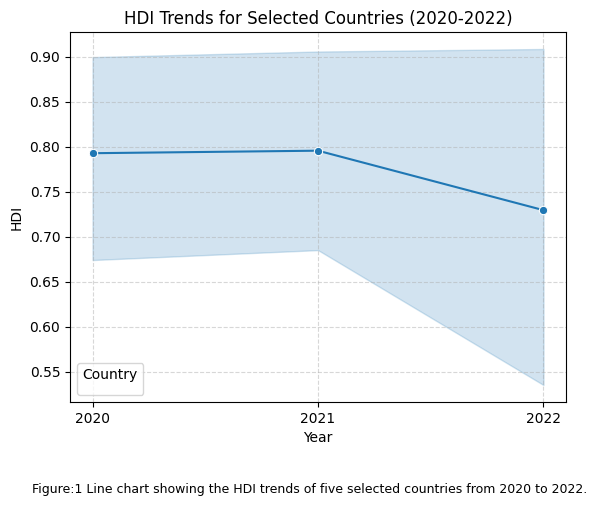

In [158]:

# Plot HDI trends for selected countries using seaborn
sns.lineplot(
    data=filtered_df[filtered_df["country"].isin(countries)],  # Filter the DataFrame for only selected countries
    x="year",     # Use 'year' column for x-axis
    y="hdi",      # Use 'hdi' column for y-axis
    hue="country", # Differentiate lines by 'country' with unique colors
    marker="o",   # Mark each data point with a circle
    palette="tab10" # Use the 'tab10' color palette for distinct colors
)

# Set x-axis ticks explicitly for years 2020, 2021, 2022
plt.xticks([2020, 2021, 2022])

# Label the x-axis as "Year"
plt.xlabel("Year")

# Label the y-axis as "HDI"
plt.ylabel("HDI")

# Add a title to the plot
plt.title("HDI Trends for Selected Countries (2020-2022)")

# Add a figure caption below the plot
plt.figtext(
    0.5, -0.08,
    "Figure:1 Line chart showing the HDI trends of five selected countries from 2020 to 2022.",
    ha="center",
    fontsize=9
)

# Add a semi-transparent dashed grid for easier reading of values
plt.grid(True, linestyle='--', alpha=0.5)

# Display a legend with the title "Country" to indicate which line corresponds to which country
plt.legend(title="Country")

# save the plot as an png
plt.savefig("Problem_1B_Line_plot.png")

# Render and display the plot
plt.show()



In the above line chart we can observe following HDI trends:

1.    Canada and Belgium:
        they are already very high  and shows a small but steady increase from 2020 to 2022. This means these countries are already doing very well, and improvements happen slowly.
2.    Albania:
        HDI shows a slight upward trend, meaning gradual improvement in living standards, education, and health.
3.    Ghana:
        HDI stays almost the same across all three years. This suggests slow or stalled progress during this period.

4.    Somalia(anomaly):
        HDI is stable from 2020 to 2021 but then drops sharply in 2022. This is unusual compared to the other countries and may reflect serious challenges such as conflict, economic instability, or health crises.
5.    Overall pattern:

        High-HDI countries improve slowly and steadily, Middle-HDI countries may improve gradually, while Low-HDI countries may remain consistent with no noticeable improvement.

In [61]:
# ======================================================================
# Task 3.B. GENERATE VISUALIZATION
# ======================================================================

print("\n"+"="*70)
print("Task 3.B. Generate Visualizations")
print("="*70)


Task 3.B. Generate Visualizations


In [62]:
# ----------------------------------------------------------------------
# Task 3.B. Bar Chart: Average HDI by Region (2020–2022)
# ----------------------------------------------------------------------

print("\n"+"-"*70)
print("Task 3.B. Bar Chart: Average HDI by Region (2020–2022)")
print("-"*70)


----------------------------------------------------------------------
Task 3.B. Bar Chart: Average HDI by Region (2020–2022)
----------------------------------------------------------------------


In [63]:
# to assign the country values with their respective region
import pycountry_convert as pc

In [64]:
# Initializing an empty dictionary to store mapping of countries to their continents/regions
region_map = {}

# Loop through each country in the 'country' column of the HDI_1B_df
for country in HDI_1B_df["country"]:
    country_name = country.strip()
    try:
        # Get the ISO alpha-2 country code using pycountry
        alpha2 = pycountry.countries.lookup(country_name).alpha_2

        # Convert the alpha-2 code to a continent code using pycountry_convert
        continent_code = pc.country_alpha2_to_continent_code(alpha2)

        # Convert the continent code to the full continent name
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)

        # Store the mapping of the country to its continent in the dictionary
        region_map[country] = continent_name
    except LookupError as e:
        # Print the country name if it could not be found/matched
        print(country)
        # Assign NaN for countries that cannot be mapped
        region_map[country] = np.nan

# Mapping the 'region_map' dictionary to create a new 'region' column in the DataFrame
HDI_1B_df['region'] = HDI_1B_df['country'].map(region_map)


# Dropping rows with no regions assigned (i.e NaN)
HDI_1B_df.dropna(subset=["region"], inplace=True)

# Display the first few rows showing country and their corresponding region
HDI_1B_df[["country", "region"]].head(10)

Timor-Leste
Timor-Leste
Timor-Leste


,country,region
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Albania,Europe
4,Albania,Europe
5,Albania,Europe
6,Algeria,Africa
7,Algeria,Africa
8,Algeria,Africa
9,Andorra,Europe


In [65]:
# Checking for any missing values
missing = HDI_1B_df["region"].isna().sum()
print("\nnumber of missing values in region column:",missing)


number of missing values in region column: 0


In [157]:
HDI_1B_df.groupby(['region', 'year'])['hdi'].mean()

region         year
Africa         2020    0.562561
               2021    0.560376
               2022    0.557037
Asia           2020    0.746506
               2021    0.746693
               2022    0.751964
Europe         2020    0.872867
               2021    0.874913
               2022    0.879355
North America  2020    0.756261
               2021    0.753739
               2022    0.760435
Oceania        2020    0.709571
               2021    0.709000
               2022    0.709857
South America  2020    0.755750
               2021    0.753667
               2022    0.762000
Name: hdi, dtype: float64

In [66]:
# Computing the mean HDI for each region-year pair.
avg_hdi = HDI_1B_df.groupby(['region', 'year'])['hdi'].mean().unstack()

print("\nmean HDI for each region-year pair:\n")
avg_hdi.head()


mean HDI for each region-year pair:



year,2020,2021,2022
region,,,
Africa,0.562561,0.560376,0.557037
Asia,0.746506,0.746693,0.751964
Europe,0.872867,0.874913,0.879355
North America,0.756261,0.753739,0.760435
Oceania,0.709571,0.709000,0.709857


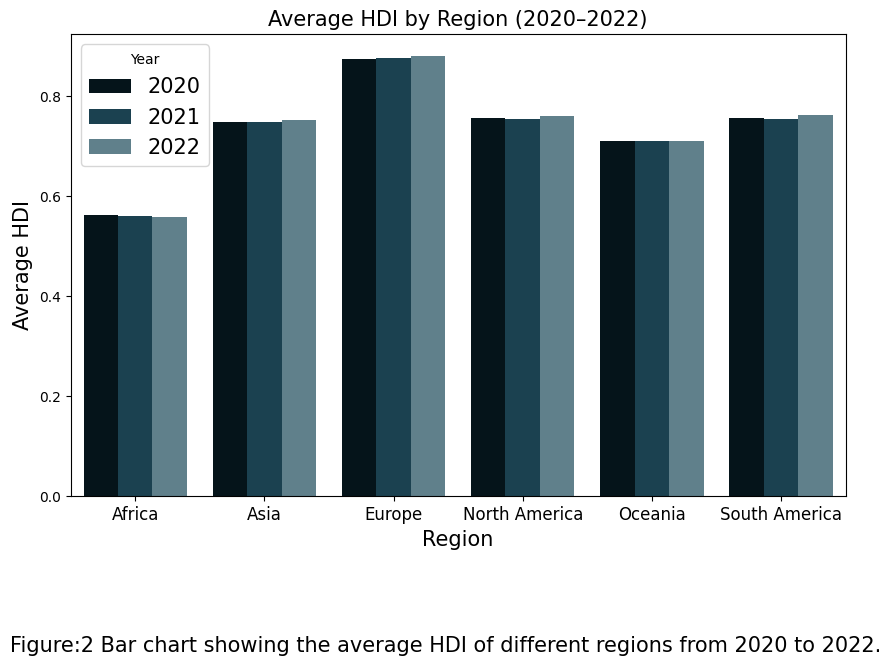

In [150]:
# Melt the avg_hdi DataFrame to long format for Seaborn
avg_hdi_long = avg_hdi.reset_index().melt(id_vars='region', var_name='year', value_name='hdi')

plt.figure(figsize=(10,6))

# Create grouped bar chart with Seaborn
sns.barplot(
    data=avg_hdi_long,
    x='region',
    y='hdi',
    hue='year',
    palette=['#01161e', '#124559', '#598392']
)

plt.xticks(fontsize=12)

# Label for the x-axis with Regions
plt.xlabel("Region",fontsize = 15)
# Label y-axis with AVG HDI
plt.ylabel("Average HDI",fontsize = 15)

# Adding a discriptive title for the graph
plt.title("Average HDI by Region (2020–2022)",fontsize = 15)

# Add figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:2 Bar chart showing the average HDI of different regions from 2020 to 2022.",
    ha="center",
    fontsize=15
)

# Display a legend with the title "year" to indicate which line corresponds to which year
plt.legend(title="Year",fontsize = 15)

# downlaoding the plot to use in report
plt.savefig("Problem_1B_Bar_plot.png")

# Render and display the plot
plt.show()


In the above Bar-Graph we can observer that:


1.   Highest average HDI:
      
        Europe has highest avergae HDI for all three years.
2.   Lowest average HDI:

        Africa has the lowest average HDI for all three years.
3.   Trends:
        
        Africa region, show a downward trend thorughout the years, suggesting decline in HDI by 2022.

        Other regions except Ocenia, shows slight upward trends throughout the years which suggests that there is slow but steady improvement in HDI across regions.

        Whereas, Ocenia shows that it has steady and constant HDI throughout the year 2020 to 2022, showing minor fluctuations.
4.   Patterns and anomalies:

        All regions follow expected patterns such as high HDI in Europe, North America, moderate HDI in Asia, south America, and Oceania, and low in Africa. Hence, has no anomalies in HDI in the years 2020 to 2022.
        




In [68]:
# ----------------------------------------------------------------------
# Task 3.B:Box Plot: HDI Distribution for 2020, 2021, and 2022
# ----------------------------------------------------------------------

print("\n"+"-"*70)
print("Task 3.B:Box Plot: HDI Distribution for 2020, 2021, and 2022")
print("-"*70)


----------------------------------------------------------------------
Task 3.B:Box Plot: HDI Distribution for 2020, 2021, and 2022
----------------------------------------------------------------------


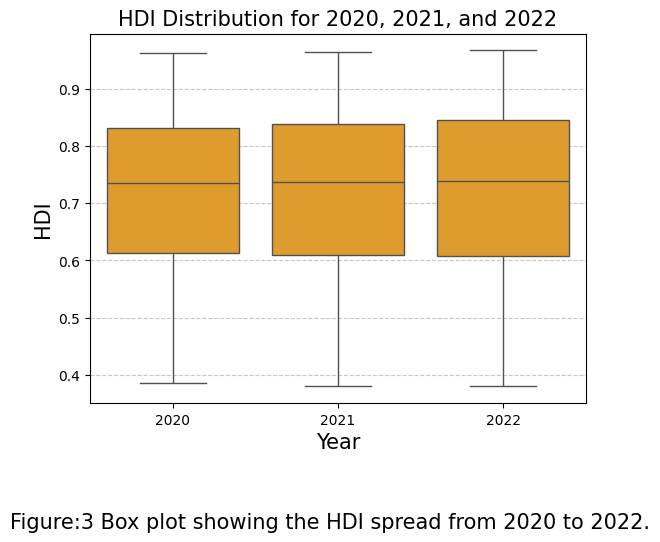

In [69]:
# Create a list of HDI values for each year
years = [2020, 2021, 2022]
hdi_spread= [HDI_1B_df[HDI_1B_df['year'] == year]['hdi'] for year in years]

# Create box plot using seaborn
sns.boxplot(
    data=HDI_1B_df,
    x='year',
    y='hdi',
    color='#fca311'
)

#Label x-axis with Year
plt.xlabel("Year",fontsize=15)

# Labek y-axis with HDI
plt.ylabel("HDI",fontsize=15)

# Adding a discripttivee title for the plot
plt.title("HDI Distribution for 2020, 2021, and 2022",fontsize=15)

# Adding a grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding a suitable caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:3 Box plot showing the HDI spread from 2020 to 2022.",
    ha="center",
    fontsize=15
)

#  downlaoding the plot to use in report
plt.savefig("Problem_1B_Box_plot.png")

#  Render and display the plot
plt.show()


In the above box-plot we can observe that:


1.   Median HDI:
        The median value("middle country") remains the same throughout the year, indicating a stable central tendency without major fluctuations. In short, the HDI hasnt changed much from 2022 to 2022 for the median value country.
2.   Spread(IQR):
        the interquartile range can be observed to be smiliar across the years, which also suggests that the variation in HDI among coutreis hasn't changed significantly across the eyars.
3.   Skewed data:
        The median is slightly above the center of the box, especially in 2020-2022.This suggests a slight negative (left) skew, meaning more countries are above the median, but the skew is not very pronounced
4.   Anomalies:
        since there are no points outside the wiskers, it suggets that there are no outliers in the HDI for year 2020,2021, and 2022.


In [70]:
# ----------------------------------------------------------------------
# Task 3.B: Scatter Plot: HDI vs. GNI per Capita
# ----------------------------------------------------------------------

print("\n"+"-"*70)
print("Task 3.B: Scatter Plot: HDI vs. GNI per Capita")
print("-"*70)


----------------------------------------------------------------------
Task 3.B: Scatter Plot: HDI vs. GNI per Capita
----------------------------------------------------------------------


In [71]:
def scatter_plot(df):
    plt.figure(figsize=(8,6))

    # Create scatter plot with regression line using seaborn
    sns.regplot(
        data=HDI_1B_df,
        x='gross_inc_percap', #Assinging the value of x
        y='hdi', #Assinging the value of x
        scatter_kws={'alpha': 1}, #setting the transparecy of the points to fully opaque
        line_kws={'color': 'red'} #setting the reg line color to red
    )

    # Label x-axis with GNI per Capita
    plt.xlabel("GNI per Capita",fontsize=15)

    # Label y-axis with HDI
    plt.ylabel("HDI",fontsize=15)

    #Adding a discriptive title for the plot
    plt.title("HDI vs GNI per Capita",fontsize=15)

    # Grid for better readability
    plt.grid(True, linestyle='--', alpha=0.5)

    # Adding a suitable caption below the plot
    plt.figtext(
        0.5, -0.15,
        "Figure:4 Scatter plot showing relation between HDI and GNI per Capital.",
        ha="center",
        fontsize=15
    )

    #  downlaoding the plot to use in report
    plt.savefig("Problem_1B_Scatter_plot.png")

    plt.show()


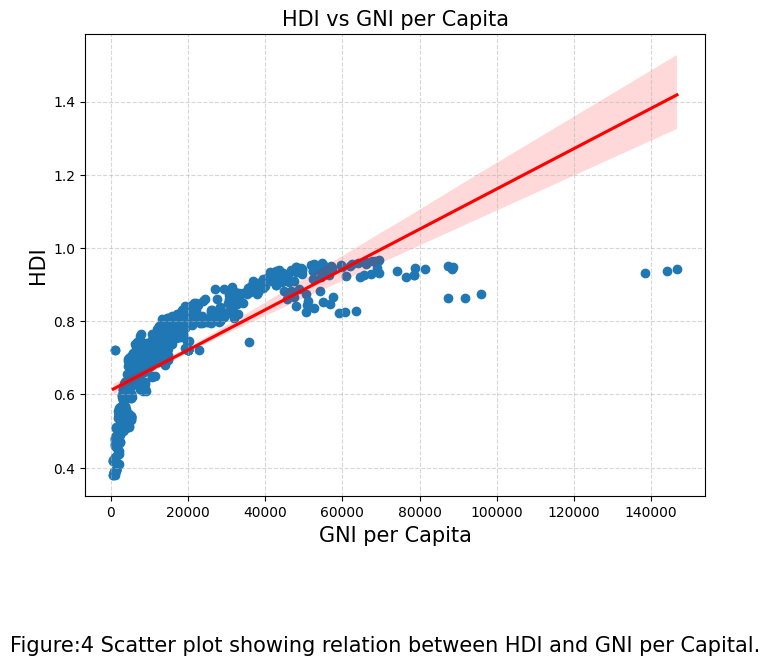

In [72]:
# Checking if the dataset contains a column for GNI per Capita.
if 'gross_inc_percap' not in HDI_1B_df.columns:
    # if no Printing suitable message
    print("GNI per Capita variable not available in the dataset.")
else:
    #if yes ploting the scatter plot between HDI and GNI per capital
    scatter_plot(HDI_1B_df)


In the above scatter-plot we can observe that:


1.   Overall trend:

      There is a clear positive relationship—countries with higher GNI per capita generally have higher HDI.

2.   Non-linear pattern:
      HDI increases rapidly at low income levels, then levels off as income rises, showing diminishing returns of income on human development.

3.   Beyond roughly middle-high incomes, HDI
      clusters around 0.9-0.95, indicating that additional income contributes less to HDI gains.

4.   Regression line insight:
      The straight regression line suggests a linear increase, but it overestimates HDI at very high income levels, where HDI hasnt exceed 1 HDI.

5.   Anomalies/outliers:

      A few very high-income countries show similar HDI to lower high-income countries.while, Some lower-income countries have relatively higher HDI than peers, suggesting the influence from other facotrs.




In [73]:

# ======================================================================
# Task 4: SHORT ANALYSIS QUESTIONSs
# ======================================================================

print("\n"+"="*70)
print("Task 4: SHORT ANALYSIS QUESTIONSs")
print("="*70)


Task 4: SHORT ANALYSIS QUESTIONSs


1.  Which countries show the greatest improvement in HDI from 2020 to 2022?

In [74]:
# Select HDI values for 2020 and 2022
hdi_2020 = HDI_1B_df.loc[HDI_1B_df['year'] == 2020, ["country", "hdi"]]
hdi_2022 = HDI_1B_df.loc[HDI_1B_df['year'] == 2022, ["country", "hdi"]]

# Initialize an empty dictionary to store HDI changes by country
country_hdi = {}

# Loop through each country in 2020 dataset
for country in hdi_2020["country"]:
    # Get the HDI value for 2020
    hdi_20 = hdi_2020.loc[hdi_2020["country"] == country, "hdi"].values[0]
    # Get the HDI value for 2022
    hdi_22 = hdi_2022.loc[hdi_2022["country"] == country, "hdi"].values[0]
    # Calculate HDI change and store in the dictionary
    country_hdi[country] = hdi_22 - hdi_20

# Sort the dictionary by HDI change in descending order (highest improvement first)
sorted_country_hdi = dict(
    sorted(country_hdi.items(), key=lambda item: item[1], reverse=True)
)

# Select the top 5 countries with the greatest HDI improvement
top_countries = dict(list(sorted_country_hdi.items())[:5])

# Print the results in a readable format
print("\n=>Countries that show the greatest improvement in HDI from 2020 to 2022 are as follow:\n")
for country, change in top_countries.items():
    print(f"{country}: {change:.3f}")



=>Countries that show the greatest improvement in HDI from 2020 to 2022 are as follow:

Andorra: 0.041
Azerbaijan: 0.038
Ecuador: 0.031
Maldives: 0.025
Mexico: 0.024


2.  Did any countries experience a decline in HDI? Provide possible reasons.

In [75]:
# Sort the dictionary by HDI change in descending order (highest improvement first)
sorted_country_hdi = dict(
    sorted(country_hdi.items(), key=lambda item: item[1], reverse=False)
)

# Select the top 5 countries with the greatest HDI improvement
top_countries = dict(list(sorted_country_hdi.items())[:10])

# Print the results in a readable format
print("Yes about 56 countries experience a decline in HDI from 2020 to 2022. some of them are:\n")
for country, change in top_countries.items():
    print(f"{country}: {change:.3f}")


Yes about 56 countries experience a decline in HDI from 2020 to 2022. some of them are:

Somalia: -0.341
Ukraine: -0.028
Afghanistan: -0.026
Namibia: -0.024
Lebanon: -0.019
Saint Vincent and the Grenadines: -0.013
Eswatini: -0.012
Suriname: -0.012
Gabon: -0.011
Paraguay: -0.011


=> Some countries experienced a     decline in HDI between 2020 and 2022. This can largely be caused due to the COVID-19 pandemic, which caused health crises, disrupted education systems, and led to economic contractions, which led to decline in factors affecting HDI such as GNI, life expectancy, population, and so on.

3.  Which region has the highest and lowest average HDI across these three years?

In [76]:
# For each year, find the region with the highest average HDI
top_regions_per_year = {}

for year in avg_hdi.columns:  # iterate through years
    print(f"\n=> for year {year}")

    # Get the region(s) with max HDI for this year
    max_hdi = avg_hdi[year].max()
    region = avg_hdi[avg_hdi[year] == max_hdi].index[0]
    print(f"highest average HDI is: {max_hdi} from region {region}")

    # Get the regions with min HDI for this year
    min_hdi = avg_hdi[year].min()
    region = avg_hdi[avg_hdi[year] == min_hdi].index[0]
    print(f"lowest average HDI is: {min_hdi} from region {region}")






=> for year 2020
highest average HDI is: 0.8728669081204727 from region Europe
lowest average HDI is: 0.562560686095932 from region Africa

=> for year 2021
highest average HDI is: 0.8749134197483798 from region Europe
lowest average HDI is: 0.5603755009107468 from region Africa

=> for year 2022
highest average HDI is: 0.8793552802134961 from region Europe
lowest average HDI is: 0.557037037037037 from region Africa


4.  Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

=> During the period 2020 to 2022, many global events have affected the HDI trends. For instance, events such as covid-19 caused many deaths, economic crisis, health crisis, which caused decline in various factors such as GNI,life ecpectancy, population and many more causing in downfall of HDI. Similarly, other events such as Russia-Ukraine War, natural disasters, post-pandamic economic shock also affected many factors such as population, health care, eduction causing HDI to decline.

On constract, many country were not affected by such crises due to effective pandamic response, economic recovery Efforts, stable goverment, resulting in moderate growth or consistent HDI through out these years.

In [77]:
# ======================================================================
# PROBLEM 2: ADVANCE HDI EXPLORATION
# ======================================================================

print("\n"+"="*70)
print("PROBLEM 2: ADVANCE HDI EXPLORATION")
print("="*70)


PROBLEM 2: ADVANCE HDI EXPLORATION


In [78]:
# ======================================================================
# Task 1. CREATE SOUTH ASIA SUBSET
# ======================================================================

print("\n"+"="*70)
print("Task 1. CREATE SOUTH ASIA SUBSET")
print("="*70)


Task 1. CREATE SOUTH ASIA SUBSET


In [79]:
# Define the list of South Asian countries
south_asian_countries= ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Filter the HDI dataset to include only these countries.
south_asia_hdi = data[data["country"].isin(south_asian_countries)]


In [80]:
# Save the filtered dataset as HDI SouthAsia.csv
south_asia_hdi.to_csv("HDI_SouthAsia.csv", index=False)


Performing cleaning process on newly created south_asia_hdi

In [81]:
# checking missing values
missing = south_asia_hdi.isnull().sum()
print(missing)

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                          25
life_expectancy               0
pop_millions                  0
hdi_f                        43
hdi_m                        43
life_expec_f                  0
life_expec_m                  0
expec_yr_school               5
expec_yr_school_f             5
expec_yr_school_m             5
mean_yr_school               20
mean_yr_school_f             20
mean_yr_school_m             20
gross_inc_percap              0
gross_inc_percap_f           33
gross_inc_percap_m           33
gender_development           43
gender_inequality            38
secondary_education_f_%      20
secondary_education_m_%      20
seats_in_parliament_f_%      15
seats_in_parliament_m_%      15
labour_participation_f_%     33
labour_participation_m_%     33
co2_emission_tons             0
mat_footprint_percap_tons    33
dtype: int64


In [82]:
'''
handeling missing value for column with 10 or more missing values
while dropping rows with minimal missing values as they don't have sifficant impact on the dataset
'''
for column in south_asia_hdi.columns:

  if missing_info[column] > 10:
    #  using aggregraation to fill the mising values
    if south_asia_hdi[column].dtypes in ["float64","int64"]:
      # for columns of datatype int and float we substitute the missing value with overall mean of the column
      south_asia_hdi[column]=south_asia_hdi[column].fillna(south_asia_hdi[column].mean())
    elif south_asia_hdi[column].dtypes == "object":
      # for columns of datatype object we substitute the missing value with mode of the column
      south_asia_hdi[column]=south_asia_hdi[column].fillna(south_asia_hdi[column].mode())
  else:
    # for column less than 10 values missing , can be considered as negligible and is unlikely to significantly affect the analysis, so we can drop the column.
    south_asia_hdi = south_asia_hdi.dropna(subset=[column])

In [83]:
print(south_asia_hdi.isna().sum())

Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
dtype: int64


In [84]:
# dropping duplicat values
south_asia_hdi.drop_duplicates()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
15,16,AFG,Afghanistan,2005,0.402,58.361,24.411191,0.512871,0.605914,59.697,...,0.832878,0.556769,3.024593,12.915637,25.925926,74.074074,38.94905,78.03819,0.077403,2.1606
16,17,AFG,Afghanistan,2006,0.410,58.684,25.442944,0.512871,0.605914,60.243,...,0.832878,0.556769,2.985100,13.786732,25.925926,74.074074,38.94905,78.03819,0.084868,1.8595
17,18,AFG,Afghanistan,2007,0.426,59.111,25.903301,0.512871,0.605914,60.909,...,0.832878,0.556769,2.945607,14.657827,25.872093,74.127907,38.94905,78.03819,0.108090,1.9607
18,19,AFG,Afghanistan,2008,0.431,59.852,26.427199,0.340361,0.499148,61.529,...,0.682000,0.690000,2.906114,15.528922,25.872093,74.127907,43.79000,82.04000,0.160989,1.5415
19,20,AFG,Afghanistan,2009,0.441,60.364,27.385307,0.348459,0.508535,61.892,...,0.685000,0.696000,2.866621,16.400018,25.925926,74.074074,36.85000,80.79000,0.233406,1.7339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,5474,LKA,Sri Lanka,2018,0.774,75.748,21.580710,0.755658,0.782754,79.493,...,0.965000,0.366000,82.841949,82.894043,5.777778,94.222222,33.48000,72.93000,0.931244,5.0224
5474,5475,LKA,Sri Lanka,2019,0.775,76.008,21.649664,0.754920,0.784578,79.743,...,0.962000,0.369000,80.170418,82.056427,5.333333,94.666667,34.40000,72.93000,0.980717,4.6892
5475,5476,LKA,Sri Lanka,2020,0.777,76.393,21.715080,0.754518,0.786264,80.111,...,0.960000,0.370000,83.963470,84.235222,5.381166,94.618834,31.96000,71.80000,0.949787,4.4117
5476,5477,LKA,Sri Lanka,2021,0.783,76.399,21.773440,0.752699,0.798247,79.502,...,0.943000,0.377000,80.645348,83.286453,5.381166,94.618834,29.68000,70.69000,0.924002,5.0605


In [85]:
# ======================================================================
# Task 2. OCMPOSITE DEVELOPMENT SCORE
# ======================================================================

print("\n"+"="*70)
print("Task 2. OCMPOSITE DEVELOPMENT SCORE")
print("="*70)


Task 2. OCMPOSITE DEVELOPMENT SCORE


In [86]:
# Create a new metric called Composite Score
south_asia_hdi["composite_score"] = (
    0.30 * south_asia_hdi["life_expectancy"] + 0.30* south_asia_hdi["gross_inc_percap"]
)

In [87]:
# Group by country and year, calculate mean composite_score (handles duplicates)
south_asia_hdi_year = south_asia_hdi.groupby(['country', 'year'])['composite_score'].mean().unstack()

# Select only the years 2020, 2021, 2022
south_asia_hdi_year = south_asia_hdi_year[[2020, 2021, 2022]]



In [88]:
print(south_asia_hdi_year.sort_values(by=2022, ascending=False))
print("\n")
print(south_asia_hdi_year.sort_values(by=2021, ascending=False))
print("\n")
print(south_asia_hdi_year.sort_values(by=2020, ascending=False))

year                2020         2021         2022
country                                           
Maldives     3723.426396  5081.257038  5678.289357
Sri Lanka    3799.859835  3910.566378  3592.832541
Bhutan       2990.462574  3093.768513  3209.130864
India        1847.941960  1982.906936  2105.481239
Bangladesh   1768.430664  1887.877074  1975.446053
Pakistan     1493.568123  1569.311545  1632.210427
Nepal        1162.337875  1182.864843  1228.811605
Afghanistan   614.813632   478.835213   419.425420


year                2020         2021         2022
country                                           
Maldives     3723.426396  5081.257038  5678.289357
Sri Lanka    3799.859835  3910.566378  3592.832541
Bhutan       2990.462574  3093.768513  3209.130864
India        1847.941960  1982.906936  2105.481239
Bangladesh   1768.430664  1887.877074  1975.446053
Pakistan     1493.568123  1569.311545  1632.210427
Nepal        1162.337875  1182.864843  1228.811605
Afghanistan   614.813632   47

Since for all three years top 5 countries are same we can sorted the values by any one year.

In [89]:
# Sort countries by 2022 composite_score in descending order
south_asia_hdi_year_sorted = south_asia_hdi_year.sort_values(by=2022, ascending=False)

# Display the table
top_5 = south_asia_hdi_year_sorted.head(5)  # Top 5 countries
print(top_5)

year               2020         2021         2022
country                                          
Maldives    3723.426396  5081.257038  5678.289357
Sri Lanka   3799.859835  3910.566378  3592.832541
Bhutan      2990.462574  3093.768513  3209.130864
India       1847.941960  1982.906936  2105.481239
Bangladesh  1768.430664  1887.877074  1975.446053


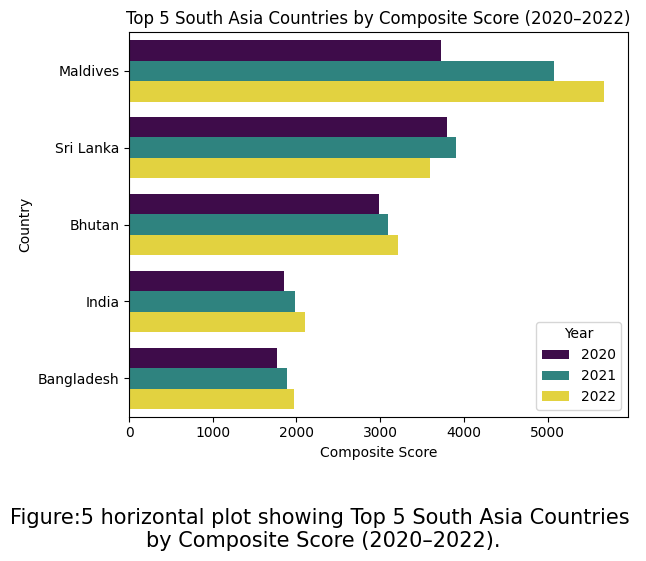

In [156]:
#  1. Prepare the data

# Group by country and year, calculate mean composite_score (handles duplicates)
south_asia_hdi_year = south_asia_hdi.groupby(['country', 'year'])['composite_score'].mean().unstack()

# Select only the years 2020, 2021, 2022
south_asia_hdi_year = south_asia_hdi_year[[2020, 2021, 2022]]

# Sort countries by 2022 composite_score in descending order
south_asia_hdi_year_sorted = south_asia_hdi_year.sort_values(by=2022, ascending=False)

# Get top 5 countries
top_5 = south_asia_hdi_year_sorted.head(5)

# Reset index for plotting
top_5_reset = top_5.reset_index()

# Melt the DataFrame to long format (needed for grouped bars)
top_5_melted = top_5_reset.melt(
    id_vars='country',
    value_vars=[2020, 2021, 2022],
    var_name='year',
    value_name='composite_score'
)


#  2. Plot the grouped horizontal bar chart

# plt.figure(figsize=(10,6))
sns.barplot(
    data=top_5_melted,
    y='country',         # Countries on y-axis
    x='composite_score', # Composite score on x-axis
    hue='year',          # Group bars by year
    palette='viridis'
)

# Labels and title
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asia Countries by Composite Score (2020–2022)")

# Adding a suitable caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:5 horizontal plot showing Top 5 South Asia Countries \nby Composite Score (2020–2022).",
    ha="center",
    fontsize=15
)

#  downlaoding the plot to use in report
plt.savefig("Problem_2_horizontal_bar_graph.png")
plt.tight_layout()

# Display a legend with the title "year" to indicate which line corresponds to which year
plt.legend(title="Year")

# Render an display the graph
plt.show()


From the above Bar Graph it can be concluded that:

1.  for the year 2020:

      Srilanka ranked highest in south Asia region in terms of /composition score follwoed by Maldives, Bhutan, India, and Bangladesh.
2.  For the year 2021 and 2022;

      Maldives overtook Srilanka as highest in south Asia region in terms of composition score. Srilanka ranked second while th eother countries retained their rankings from the year 2020.

In [91]:
# ======================================================================
# Task 3. OUTLIER DETECTION
# ======================================================================

print("\n"+"="*70)
print("Task 3. OUTLIER DETECTION")
print("="*70)


Task 3. OUTLIER DETECTION


In [92]:
# calculating Q1 and Q3 for south asia hdi dataset
Q1_hdi = south_asia_hdi["hdi"].quantile(0.25)
Q3_hdi = south_asia_hdi["hdi"].quantile(0.75)

# calculating IQR
IQR_hdi = Q3_hdi - Q1_hdi

# calulating lower bound
hdi_lower = Q1_hdi - 1.5 * IQR_hdi

# calulating upper bound
hdi_upper = Q3_hdi + 1.5 * IQR_hdi

In [93]:
# calculating Q1 and Q3 for gross income per capital
Q1_gni = south_asia_hdi["gross_inc_percap"].quantile(0.25)
Q3_gni = south_asia_hdi["gross_inc_percap"].quantile(0.75)

# calculating IQR
IQR_gni = Q3_gni - Q1_gni

# calulating lower bound
gni_lower = Q1_gni - 1.5 * IQR_gni
# calculating upper bound
gni_upper = Q3_gni + 1.5 * IQR_gni

In [94]:
# filtering outlier points
south_asia_hdi["Outlier"] = (
    (south_asia_hdi["hdi"] < hdi_lower) | (south_asia_hdi["hdi"] > hdi_upper) |
    (south_asia_hdi["gross_inc_percap"] < gni_lower) | (south_asia_hdi["gross_inc_percap"] > gni_upper)
)

In [95]:
# storing outliers in outliers
outliers = south_asia_hdi[south_asia_hdi["Outlier"] == True]
outliers[["country", "hdi", "gross_inc_percap","year"]]

,country,hdi,gross_inc_percap,year
3514,Maldives,0.670,16391.40757,2006
3521,Maldives,0.715,15648.36655,2013
3522,Maldives,0.723,16410.16419,2014
3523,Maldives,0.728,16414.93039,2015
3524,Maldives,0.734,16911.45422,2016
3525,Maldives,0.740,17474.64201,2017
3526,Maldives,0.747,18055.72465,2018
3527,Maldives,0.753,18679.92536,2019
3529,Maldives,0.753,16857.60546,2021
3530,Maldives,0.762,18846.79219,2022


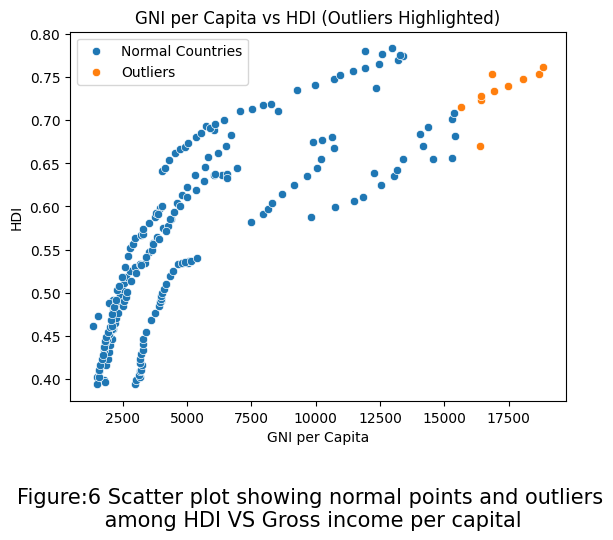

In [96]:
# Separate normal points and outliers
normal = south_asia_hdi[south_asia_hdi["Outlier"] == False]
outlier_points = south_asia_hdi[south_asia_hdi["Outlier"] == True]

# plot the scartter plot
sns.scatterplot(
    data=normal, #for normal data points
    x="gross_inc_percap", # gross_inc_percap on x-axis
    y="hdi", # hdi on y_axis
    label="Normal Countries"
)

sns.scatterplot(
    data=outlier_points, # for ouliter data points
    x="gross_inc_percap", #  gross inc percap on x-axis
    y="hdi", # hdi on x-axis
    label="Outliers"
)

# label for x-axis
plt.xlabel("GNI per Capita")

#label for y_axis
plt.ylabel("HDI")

# a discriptive title for the graph
plt.title("GNI per Capita vs HDI (Outliers Highlighted)")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:6 Scatter plot showing normal points and outliers\n among HDI VS Gross income per capital",
    ha="center",
    fontsize=15
)

#  downlaoding the plot to use in report
plt.savefig("Problem_2_outiers_highlights.png")

# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



From the above Scatter plot revelas that their were some ouliers in Soth Asia Region in terms of GNI and HDI indexes. The ouliers are observed to be upper bound. The plot can be interpreated as , the oulier countries  despite having comparatively higher income levels had lower HDI comparative to those with lesser GNI than oulier country and emphasizes that human development is influenced by multiple factors beyond economic prosperity.

In [97]:
# ======================================================================
# Task 4. EXPLORING METRIC RELATIONSHIP
# ======================================================================

print("\n"+"="*70)
print("Task 4. EXPLORING METRIC RELATIONSHIP")
print("="*70)


Task 4. EXPLORING METRIC RELATIONSHIP


In [98]:
# Selected two HDI components: gender_development and life_expectancy
# Computing personal correlation of gender_development with HDI
corr_gender = south_asia_hdi["gender_development"].corr(south_asia_hdi["hdi"])

# Computing personal correlation of life expectancy with HDI
corr_life = south_asia_hdi["life_expectancy"].corr(south_asia_hdi["hdi"])

# Displaying  person correlationship of eac metric with HDI
print("Pearson Correlation with HDI:")
print(f"Gender Development Index vs HDI: {corr_gender:.3f}")
print(f"Life Expectancy Index vs HDI: {corr_life:.3f}")

Pearson Correlation with HDI:
Gender Development Index vs HDI: 0.854
Life Expectancy Index vs HDI: 0.950


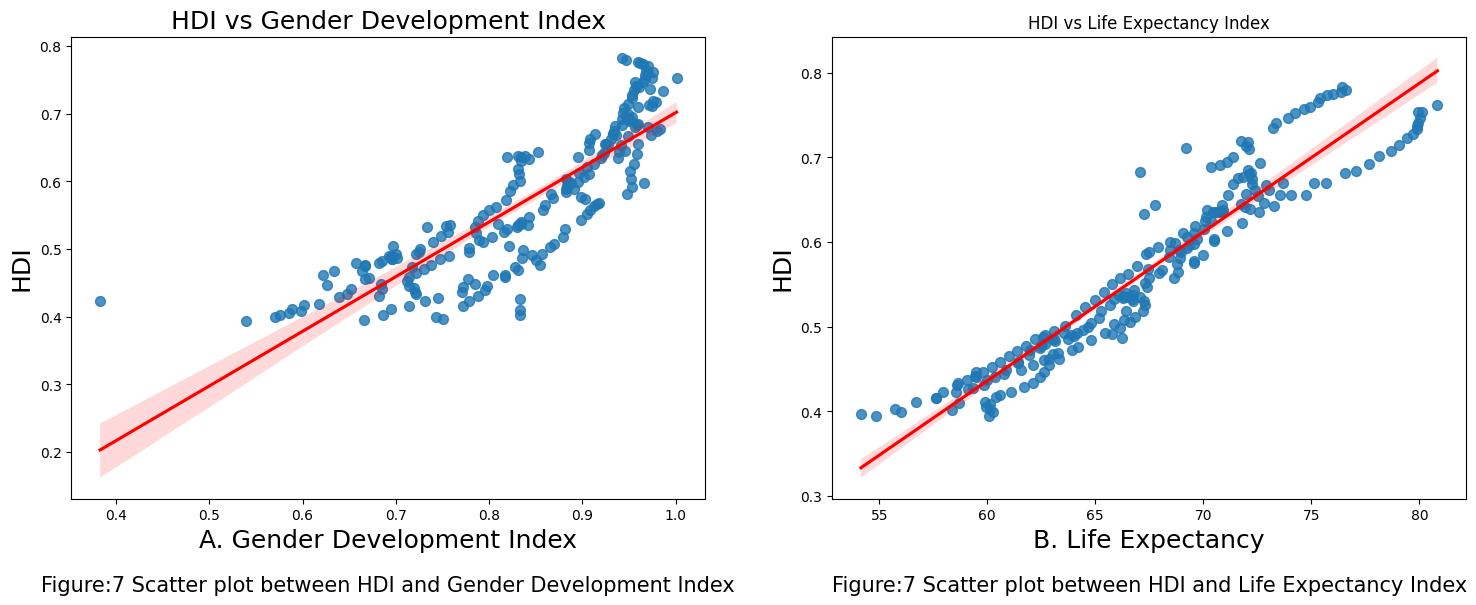

In [99]:
# Create figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # wider figure

# Plot 1: HDI vs Gender Development Index
sns.regplot(
    x="gender_development",
    y="hdi",
    data=south_asia_hdi,
    ax=axes[0],
    scatter_kws={"s": 50},
    line_kws={"color": "red"}
)
axes[0].set_title("HDI vs Gender Development Index", fontsize=18)
# Add caption below first subplot
axes[0].annotate(
    "Figure:7 Scatter plot between HDI and Gender Development Index",
    xy=(0.5, -0.2),
    xycoords='axes fraction',
    ha='center',
    fontsize=15
)
axes[0].set_xlabel("A. Gender Development Index", fontsize=18)
axes[0].set_ylabel("HDI", fontsize=18)

# Plot 2: HDI vs Life Expectancy Index
sns.regplot(
    x="life_expectancy",
    y="hdi",
    data=south_asia_hdi,
    ax=axes[1],
    scatter_kws={"s": 50},
    line_kws={"color": "red"}
)
axes[1].set_title("HDI vs Life Expectancy Index")
# Add caption below second subplot
axes[1].annotate(
    "Figure:7 Scatter plot between HDI and Life Expectancy Index",
    xy=(0.5, -0.2), #horizontal position, vertical position
    xycoords='axes fraction',
    ha='center',
    fontsize=15
)
axes[1].set_xlabel("B. Life Expectancy", fontsize=18)
axes[1].set_ylabel("HDI", fontsize=18)

#  downlaoding the plot to use in report
plt.savefig("Problem_2_metric_relationship_analysis.png")
# Rendering and displaying the plots
plt.show()


Based on the scatter plots:

1. Most strongly related to HDI:

      Life Expectancy Index is most strongly related to HDI since the points are tightly clustered around the trendline.This shows a strong, clear linear relationship with HDI.As life expectancy increases, HDI increases consistently with little variation.

2. Weakest relationship with HDI:
      Gender Development Index has weakest relationship with HDI since the points are more spread out around the trendline.This indicates greater variability and a weaker correlation with HDI compared to life expectancy.While HDI still increases as gender development improves, the relationship is less direct.

In [100]:
# ======================================================================
# Task 5. GAP ANALYSIS
# ======================================================================

print("\n"+"="*70)
print("Task 5. GAP ANALYSIS")
print("="*70)


Task 5. GAP ANALYSIS


In [101]:
# Creating a new metric GNI_HDI_Gap
south_asia_hdi["GNI_HDI_Gap"] = (
    south_asia_hdi["gross_inc_percap"] - south_asia_hdi["hdi"]
)

In [102]:
# Ranking South Asian countries by GNI HDI Gap in descending order.
gap_desc = south_asia_hdi.sort_values("GNI_HDI_Gap", ascending=False)
gap_desc[["country", "gross_inc_percap", "hdi", "GNI_HDI_Gap"]]


,country,gross_inc_percap,hdi,GNI_HDI_Gap
3530,Maldives,18846.792190,0.762,18846.030190
3527,Maldives,18679.925360,0.753,18679.172360
3526,Maldives,18055.724650,0.747,18054.977650
3525,Maldives,17474.642010,0.740,17473.902010
3524,Maldives,16911.454220,0.734,16910.720220
...,...,...,...,...
4060,Nepal,1569.313150,0.403,1568.910150
31,Afghanistan,1534.135377,0.473,1533.662377
4059,Nepal,1515.347144,0.395,1514.952144
15,Afghanistan,1508.275616,0.402,1507.873616


In [103]:
# Rank South Asian countries by GNI HDI Gap in ascending order.
gap_asc = south_asia_hdi.sort_values("GNI_HDI_Gap", ascending=True)
gap_asc[["country", "gross_inc_percap", "hdi", "GNI_HDI_Gap"]]


,country,gross_inc_percap,hdi,GNI_HDI_Gap
32,Afghanistan,1335.205733,0.462,1334.743733
15,Afghanistan,1508.275616,0.402,1507.873616
4059,Nepal,1515.347144,0.395,1514.952144
31,Afghanistan,1534.135377,0.473,1533.662377
4060,Nepal,1569.313150,0.403,1568.910150
...,...,...,...,...
3524,Maldives,16911.454220,0.734,16910.720220
3525,Maldives,17474.642010,0.740,17473.902010
3526,Maldives,18055.724650,0.747,18054.977650
3527,Maldives,18679.925360,0.753,18679.172360


In [104]:
# Viewing the top 3 negative gaps.
gap_asc[["country", "hdi","gross_inc_percap","GNI_HDI_Gap"]].head(3)

,country,hdi,gross_inc_percap,GNI_HDI_Gap
32,Afghanistan,0.462,1335.205733,1334.743733
15,Afghanistan,0.402,1508.275616,1507.873616
4059,Nepal,0.395,1515.347144,1514.952144


In [105]:
# Viewing the top 3 positive gaps.
gap_desc[["country", "hdi","gross_inc_percap","GNI_HDI_Gap","year"]].head(3)

,country,hdi,gross_inc_percap,GNI_HDI_Gap,year
3530,Maldives,0.762,18846.79219,18846.03019,2022
3527,Maldives,0.753,18679.92536,18679.17236,2019
3526,Maldives,0.747,18055.72465,18054.97765,2018


When ranking countries by the GNI_HDI_Gap, the initial results showed that the top observations were dominated by the same country appearing in multiple years. This made cross-country comparison less meaningful. Therefore, to ensure fair and interpretable comparison, the analysis will be restricted to the most recent year available(2022). the tope three countries are to be then selected as per the GNI_HDI_Gap for that yeaar ony.

In [106]:
# Getting the top positive an dnegative for the latest year on dataset 2022
top_positive = gap_desc[gap_desc["year"] == 2022].head(3)
top_negative = gap_asc[gap_asc["year"] == 2022].head(3)

print("\ntop 3 positive countries by GNI_HDI_Gap are:\n")
top_positive[["country","GNI_HDI_Gap","hdi","gross_inc_percap"]]


top 3 positive countries by GNI_HDI_Gap are:



,country,GNI_HDI_Gap,hdi,gross_inc_percap
3530,Maldives,18846.03019,0.762,18846.79219
5477,Sri Lanka,11898.71847,0.780,11899.49847
659,Bhutan,10624.19288,0.681,10624.87388


In [107]:
print("\ntop 3 negative countries by GNI_HDI_Gap are:\n")
top_negative[["country","GNI_HDI_Gap","hdi","gross_inc_percap"]]


top 3 negative countries by GNI_HDI_Gap are:



,country,GNI_HDI_Gap,hdi,gross_inc_percap
32,Afghanistan,1334.743733,0.462,1335.205733
4091,Nepal,4024.953685,0.601,4025.554685
4388,Pakistan,5373.730423,0.540,5374.270423


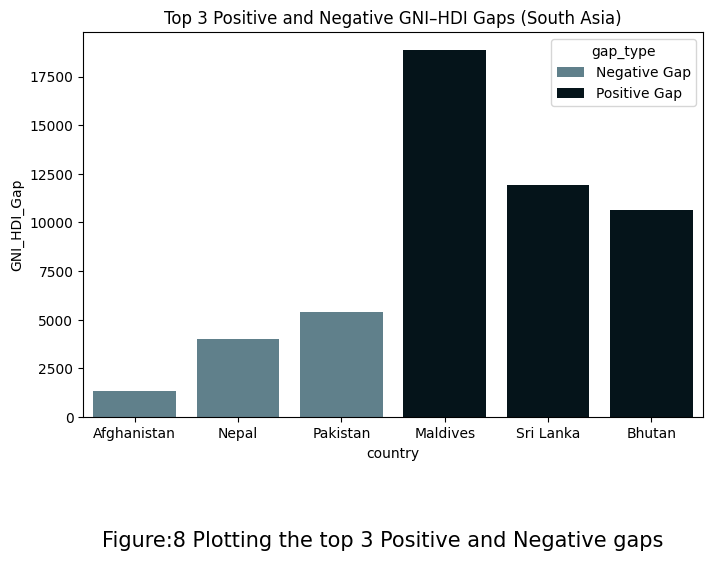

In [152]:
# Combine the top negative and top positive gaps into a single dataframe for plotting
gap_plot = pd.concat([top_negative, top_positive])

# Create a new column 'gap_type' to label each row as Negative or Positive
# This is used to assign colors in the plot
gap_plot["gap_type"] = ["Negative Gap"]*len(top_negative) + ["Positive Gap"]*len(top_positive)

# Define a custom color palette for the two gap types
# '#01161e' for Positive Gap, '#598392' for Negative Gap
palette = {
    "Positive Gap": "#01161e",
    "Negative Gap": "#598392"
}

# Create a figure with size 8x5 inches
plt.figure(figsize=(8,5))

# Create a bar plot using Seaborn
# x = country names
# y = GNI_HDI_Gap values
# hue = gap_type to differentiate Positive vs Negative bars
# dodge=False ensures that bars for different 'gap_type' appear in the same location
sns.barplot(
    data=gap_plot,
    x="country",
    y="GNI_HDI_Gap",
    hue="gap_type",
    palette=palette
)

# Set the title of the plot
plt.title("Top 3 Positive and Negative GNI–HDI Gaps (South Asia)")

# Add a figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:8 Plotting the top 3 Positive and Negative gaps",
    ha="center",
    fontsize=15
)

#  downlaoding the plot to use in report
plt.savefig("Problem_2_GNI_HDI_Gap_Analysis.png")

# Display the plot
plt.show()


Above Bar Grpah visualizes the top 3 Positive and Negative countries based on GNI_HDI gaps of south Asia region.
However, because HDI and GNI are on very different scales, HDI ranging between 0 to 1 while GNI ranging from 1000 to 10000+, taking their difference doesn’t yield any significant results.  the countries recorded as top three positive and negative based on GNI-HDI gaps are also top three positive and negative countries based on GNI index alone.

In [109]:
# ======================================================================
# PROBLEM 3: COMPARATIVE REGIONAL ANALYSIS: SOUTH ASIA VS. MIDDLE EAST
# ======================================================================

print("\n"+"="*70)
print("PROBLEM 3: COMPARATIVE REGIONAL ANALYSIS: SOUTH ASIA VS. MIDDLE EAST")
print("="*70)


PROBLEM 3: COMPARATIVE REGIONAL ANALYSIS: SOUTH ASIA VS. MIDDLE EAST


In [110]:
# ======================================================================
# TASK 1. CREATE MIDDLE EAST SUBSET
# ======================================================================

print("\n"+"="*70)
print("TASK 1. CREATE MIDDLE EAST SUBSET")
print("="*70)


TASK 1. CREATE MIDDLE EAST SUBSET


In [111]:
# Reading from HDI_problem1B.csv
data_1b = pd.read_csv("/content/HDI_problem1B.csv")

In [112]:
# Define the list of Middle East countries:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]


In [113]:
# Loading dataset
middle_east_df = data_1b[
    data_1b["country"].isin(middle_east_countries)
]


In [114]:
# Defining the list of South Asia Countries
south_asia_countries =["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"]

In [115]:
# loaidng dataset for the south_asian countries
south_asia_df = data_1b[
    data_1b["country"].isin(south_asia_countries)
]

In [116]:
# Saving these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


In [117]:
# ======================================================================
# TASK 2: DESCRIPTIVE STATISTICS
# ======================================================================

print("\n"+"="*70)
print("TASK 2: DESCRIPTIVE STATISTICS")
print("="*70)


TASK 2: DESCRIPTIVE STATISTICS


In [118]:
# Load regional datasets
south_asia_df = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east_df = pd.read_csv("HDI_MiddleEast_2020_2022.csv")

# Compute mean and standard deviation of HDI for south_asia
south_asia_mean = south_asia_df["hdi"].mean()
south_asia_std = south_asia_df["hdi"].std()

# Compute mean and standard deviation of HDI for middle_east
middle_east_mean = middle_east_df["hdi"].mean()
middle_east_std = middle_east_df["hdi"].std()

# Displaying descriptive statistics
print("South Asia HDI Statistics (2020–2022):")
print("\nmean hdi for south asia countries: ", south_asia_mean)
print("standard deviation of hdi for south asia countries: ",south_asia_std)

print("\nMiddle East HDI Statistics (2020–2022):")
print("\nmean hdi for middle east countries: ", middle_east_mean)
print("standard deviation of hdi for middle east countries: ",middle_east_std)


South Asia HDI Statistics (2020–2022):

mean hdi for south asia countries:  0.6395833333333333
standard deviation of hdi for south asia countries:  0.09827331747496995

Middle East HDI Statistics (2020–2022):

mean hdi for middle east countries:  0.7889090909090909
standard deviation of hdi for middle east countries:  0.14129476362297624


=>Middle East countries generally achieve higher HDI values, while, South Asia shows lower average HDI, highlighting development gaps.
Although, south asia has comparatively low standard deviation than Middle East region suggesting more consistent human development across the countries, South Asia overall development is lower comparative to Middle East.

Hence, Middle East countries perform better on average.

In [119]:
# ======================================================================
# TASK 3: TOP AND BOTTOM PERFORMERS
# ======================================================================

print("\n"+"="*70)
print("TASK 3: TOP AND BOTTOM PERFORMERS")
print("="*70)


TASK 3: TOP AND BOTTOM PERFORMERS


In [120]:
# Identifing top 3 from each dataset
south_asia_top_3 = south_asia_df.sort_values("hdi", ascending=False)
middle_east_top_3 = middle_east_df.sort_values("hdi", ascending=False)

# Identifing bottom 3 from each dataset
south_asia_bottom_3 = south_asia_df.sort_values("hdi")
middle_east_bottom_3 = middle_east_df.sort_values("hdi")



In [121]:
# Taking data from latest year only for better interpretation
# Identifing top 3 from each dataset
south_asia_top_3 = south_asia_top_3[south_asia_top_3["year"] == 2022].head(3)
middle_east_top_3 = middle_east_top_3[middle_east_top_3["year"] == 2022].head(3)

# Identifing bottom 3 from each dataset
south_asia_bottom_3 = south_asia_bottom_3[south_asia_bottom_3["year"] == 2022].head(3)
middle_east_bottom_3 = middle_east_bottom_3[middle_east_bottom_3["year"] == 2022].head(3)

In [122]:
print("top 3 HDI performers of South Asia:\n")
print(south_asia_top_3[["country","hdi"]])

print("\ntop 3 HDI performers of Middle East:\n")
print(middle_east_top_3[["country","hdi"]])

top 3 HDI performers of South Asia:

      country    hdi
23  Sri Lanka  0.780
14   Maldives  0.762
8      Bhutan  0.681

top 3 HDI performers of Middle East:

                 country    hdi
29  United Arab Emirates  0.937
8                 Israel  0.915
2                Bahrain  0.888


In [123]:
print("bottom 3 HDI performers of South Asia:\n")
print(south_asia_bottom_3[["country","hdi"]])

print("\nbottom 3 HDI performers of Middle East:\n")
print(middle_east_bottom_3[["country","hdi"]])

bottom 3 HDI performers of South Asia:

        country    hdi
2   Afghanistan  0.462
20     Pakistan  0.540
17        Nepal  0.601

bottom 3 HDI performers of Middle East:

    country    hdi
32    Yemen  0.424
5      Iraq  0.673
17  Lebanon  0.723


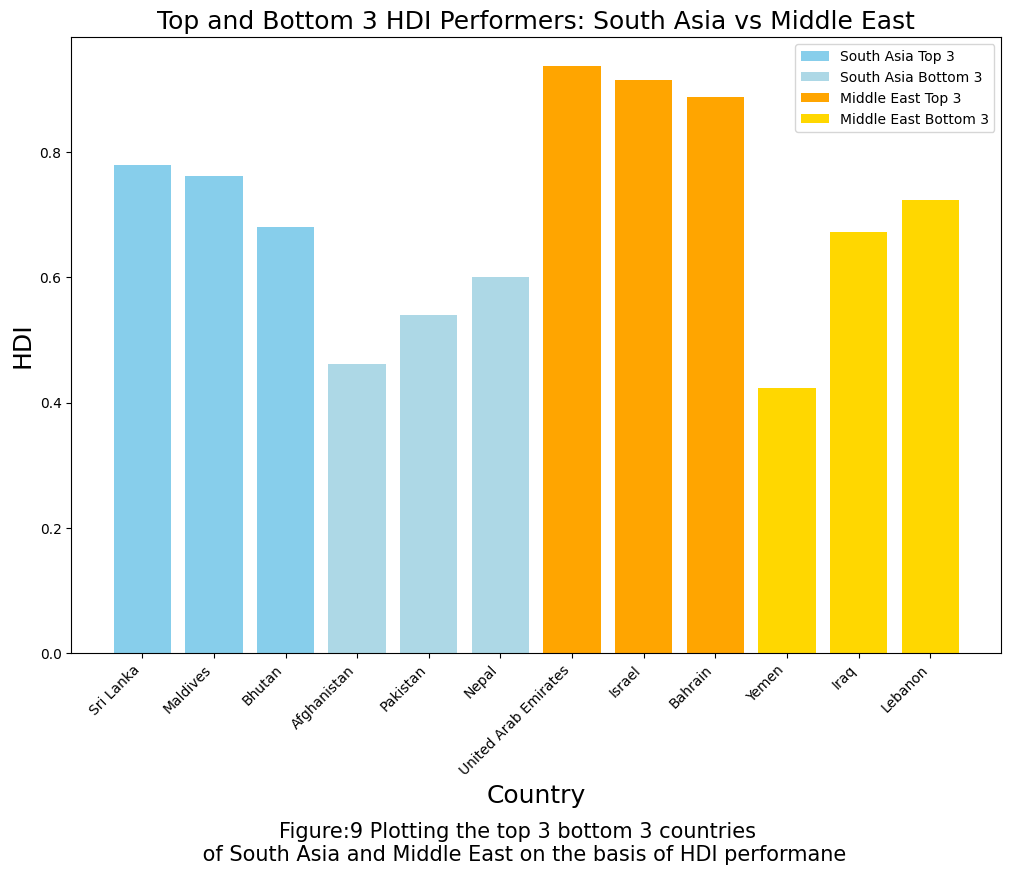

In [124]:
from matplotlib.patches import Patch

# Step 1: Add 'group' and 'region' labels to each dataframe
south_asia_top_3["group"] = "Top 3"
south_asia_bottom_3["group"] = "Bottom 3"
middle_east_top_3["group"] = "Top 3"
middle_east_bottom_3["group"] = "Bottom 3"

south_asia_top_3["region"] = "South Asia"
south_asia_bottom_3["region"] = "South Asia"
middle_east_top_3["region"] = "Middle East"
middle_east_bottom_3["region"] = "Middle East"

# Step 2: Combine all four datasets
combined_df = pd.concat([
    south_asia_top_3,
    south_asia_bottom_3,
    middle_east_top_3,
    middle_east_bottom_3
])

# Step 3: Create a 'region_group' column for color mapping
combined_df["region_group"] = combined_df["region"] + " " + combined_df["group"]

# Define colors for each combination
color_map = {
    "South Asia Top 3": "skyblue",
    "South Asia Bottom 3": "lightblue",
    "Middle East Top 3": "orange",
    "Middle East Bottom 3": "gold"
}

# Map colors
colors = combined_df["region_group"].map(color_map)

# Step 4: Plot bar chart
plt.figure(figsize=(12,8))

# Use 'country' explicitly as x-axis, 'hdi' as height, and colors from mapping
plt.bar(
    x=combined_df["country"],
    height=combined_df["hdi"],
    color=colors
)

# Labels and title
plt.xlabel("Country", fontsize=18)
plt.ylabel("HDI", fontsize=18)
plt.title("Top and Bottom 3 HDI Performers: South Asia vs Middle East", fontsize=18)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add a figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:9 Plotting the top 3 bottom 3 countries \n of South Asia and Middle East on the basis of HDI performane",
    ha="center",
    fontsize=15
)

#Adding manual legend
legend_elements = [
    Patch(facecolor='skyblue', label='South Asia Top 3'),
    Patch(facecolor='lightblue', label='South Asia Bottom 3'),
    Patch(facecolor='orange', label='Middle East Top 3'),
    Patch(facecolor='gold', label='Middle East Bottom 3')
]

#  downlaoding the plot to use in report
plt.savefig("Problem_3_top_bottom_HDI.png", bbox_inches="tight")

# Display a legend indicating region and top or bottom countires
plt.legend(handles=legend_elements)

# Render and display the plot
plt.show()


ABove grouped bar graph reveals that both top and bottom countries form Middle East region overperforms compared to that of South Asia region in terms of HDI performance.

In [125]:
# ======================================================================
# TASK 4: METRIC COMPARISION
# ======================================================================

print("\n"+"="*70)
print("TASK 4: METRIC COMPARISION")
print("="*70)


TASK 4: METRIC COMPARISION


In [126]:
# Compute min and max of gross_inc_percap
min_val = south_asia_df['gross_inc_percap'].min()
max_val = south_asia_df['gross_inc_percap'].max()

# Apply min-max scaling
south_asia_df['gni_scaled'] = (south_asia_df['gross_inc_percap'] - min_val) / (max_val - min_val)

# Compute min and max of life expectancy
min_val = south_asia_df['life_expectancy'].min()
max_val = south_asia_df['life_expectancy'].max()

# Apply min-max scaling
south_asia_df['life_expec_scaled'] = (south_asia_df['life_expectancy'] - min_val) / (max_val - min_val)


In [127]:
# Compute average values for each metric in south asia region
south_asia_avg = south_asia_df[["gender_development", "life_expec_scaled", "gni_scaled"]].mean().reset_index()
south_asia_avg.columns = ["Metric", "Value"]
south_asia_avg["Region"] = "South Asia"
south_asia_avg

,Metric,Value,Region
0,gender_development,0.881458,South Asia
1,life_expec_scaled,0.476644,South Asia
2,gni_scaled,0.367260,South Asia


In [128]:
# Compute min and max of gross_inc_percap
min_val = middle_east_df['gross_inc_percap'].min()
max_val = middle_east_df['gross_inc_percap'].max()

# Apply min-max scaling
middle_east_df['gni_scaled'] = (middle_east_df['gross_inc_percap'] - min_val) / (max_val - min_val)

# Compute min and max of life expectancy
min_val = middle_east_df['life_expectancy'].min()
max_val = middle_east_df['life_expectancy'].max()

# Apply min-max scaling
middle_east_df['life_expec_scaled'] = (middle_east_df['life_expectancy'] - min_val) / (max_val - min_val)

In [129]:
# Compute average values for each metric in Middle East region
middle_east_avg = middle_east_df[["gender_development", "life_expec_scaled", "gni_scaled"]].mean().reset_index()
middle_east_avg.columns = ["Metric", "Value"]
middle_east_avg["Region"] = "Middle East"

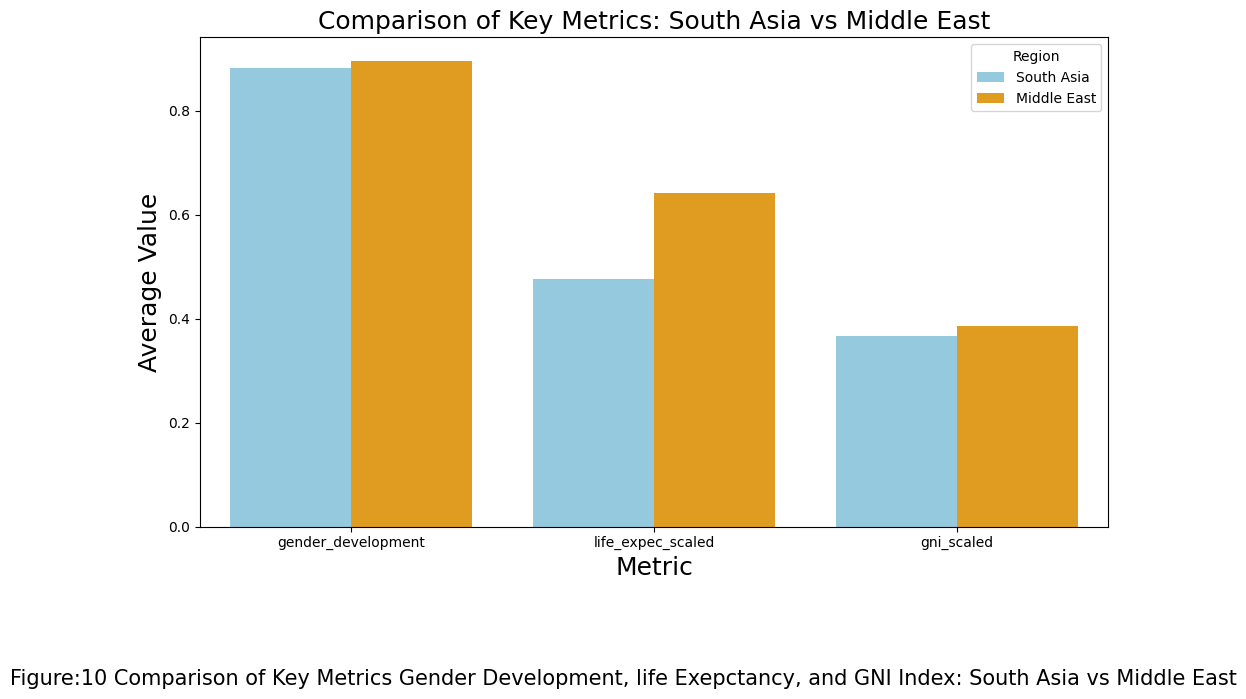

In [130]:
# Combine both regions
combined_avg = pd.concat([south_asia_avg, middle_east_avg], ignore_index=True)

# Plot grouped bar chart
plt.figure(figsize=(10,6))

sns.barplot(
    data=combined_avg,
    x="Metric",     # Metrics on x-axis
    y="Value",      # Average value
    hue="Region",   # Group by region
    palette=["skyblue", "orange"]
)

plt.title("Comparison of Key Metrics: South Asia vs Middle East", fontsize=18)
plt.ylabel("Average Value",fontsize=18)
plt.xlabel("Metric",fontsize=18)

# Add a figure caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:10 Comparison of Key Metrics Gender Development, life Exepctancy, and GNI Index: South Asia vs Middle East",
    ha="center",
    fontsize=15
)

#  downlaoding the plot to use in report
plt.savefig("Problem_3_Key_metric_comparison.png")

plt.legend(title="Region")
plt.tight_layout()
plt.show()



Above Bar graph illustrates that Middle East countires perform better than South Asia countries in terms of other metrics like gender devlopment, healt, and gross national income which can also be the reason for better HDI performance of Middle East region.

In [131]:
# Step 3: Identify the greatest disparity

# Pivot the table to compare differences
pivot_avg = combined_avg.pivot(index="Metric", columns="Region", values="Value")
pivot_avg["Disparity"] = abs(pivot_avg["South Asia"] - pivot_avg["Middle East"])
pivot_avg = pivot_avg.sort_values(by="Disparity", ascending=False)

print("Metrics ranked by disparity between regions:")
print(pivot_avg)


Metrics ranked by disparity between regions:
Region              Middle East  South Asia  Disparity
Metric                                                
life_expec_scaled      0.642734    0.476644   0.166089
gni_scaled             0.386393    0.367260   0.019133
gender_development     0.896545    0.881458   0.015087


In [132]:
combined_avg

,Metric,Value,Region
0,gender_development,0.881458,South Asia
1,life_expec_scaled,0.476644,South Asia
2,gni_scaled,0.367260,South Asia
3,gender_development,0.896545,Middle East
4,life_expec_scaled,0.642734,Middle East
5,gni_scaled,0.386393,Middle East


In [133]:
# ======================================================================
# TASK 5: HDI DISPARITY
# ======================================================================

print("\n"+"="*70)
print("TASK 5: HDI DISPARITY")
print("="*70)


TASK 5: HDI DISPARITY


In [134]:
# range for south_asia region
south_asia_range = south_asia_df["hdi"].max() - south_asia_df["hdi"].min()
# range fo middle east region
middle_east_range = middle_east_df["hdi"].max() - middle_east_df["hdi"].min()

print("the range of hdi in south asia region is : ",south_asia_range)
print("the range of the hdi in the midddle east region is:", middle_east_range)


the range of hdi in south asia region is :  0.321
the range of the hdi in the midddle east region is: 0.5130000000000001


In [135]:
# coefficient variation of south_asia
south_asia_cv = south_asia_df["hdi"].std() / south_asia_df["hdi"].mean()
# coefficient variation of middle east
middle_east_cv = middle_east_df["hdi"].std() / middle_east_df["hdi"].mean()

print("the coefficient Variation for hdi in south asia region is : ",south_asia_cv)
print("the coefficient variation for hdi in the midddle east region is:", middle_east_cv)

the coefficient Variation for hdi in south asia region is :  0.1536520924690084
the coefficient variation for hdi in the midddle east region is: 0.17910145193048382


Since the coefficient variation of the middle east region is greater than tha of south asia, middle east region exhibits more variation in HDI.

In [136]:
# ======================================================================
# TASK 6: CORRELATION ANALYSIS
# ======================================================================

print("\n"+"="*70)
print("TASK 6: CORRELATION ANALYSIS")
print("="*70)


TASK 6: CORRELATION ANALYSIS


In [137]:
# for south asia region
# correlation of HDI with gender development
south_asia_corr_gender_dev = south_asia_df["hdi"].corr(south_asia_df["gender_development"])

# Correlation of HDI with life expectancy
south_asia_corr_life_expectancy = south_asia_df["hdi"].corr(south_asia_df["life_expectancy"])

print("\ncorrelation of HDI with gender development for south asia region is:\n", south_asia_corr_gender_dev)
print("correlation of HDI with life expectancy for south asia region is:\n", south_asia_corr_life_expectancy)


correlation of HDI with gender development for south asia region is:
 0.8742177004831327
correlation of HDI with life expectancy for south asia region is:
 0.9387641385416623


In [138]:
# For middle east region
# Correlation of HDI with gender development
middle_east_corr_gender_dev = middle_east_df["hdi"].corr(middle_east_df["gender_development"])

# Correlation of HDI with life expectancy
middle_east_corr_life_expectancy = middle_east_df["hdi"].corr(middle_east_df["life_expectancy"])

print("\ncorrelation of HDI with gender development for middle east region is:\n", middle_east_corr_gender_dev)
print("correlation of HDI with life expectancy for middle east region is:\n", middle_east_corr_life_expectancy)


correlation of HDI with gender development for middle east region is:
 0.9356697525724119
correlation of HDI with life expectancy for middle east region is:
 0.9331227568940162


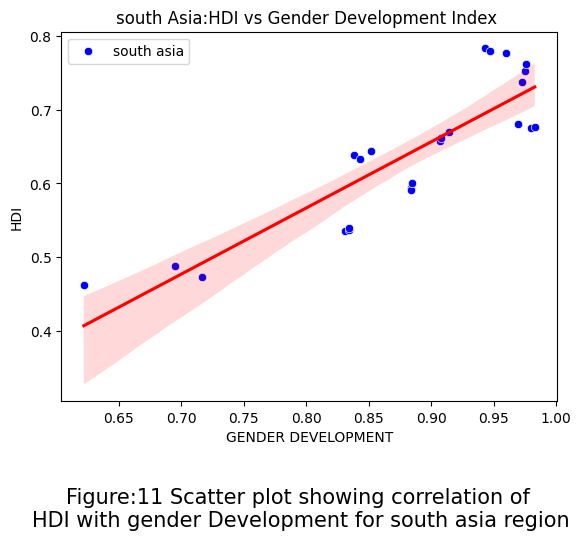

In [139]:

# plot the scartter plot
sns.scatterplot(
    data=south_asia_df, #for south asia region
    x="gender_development", # ggender development on x-axis
    y="hdi", # hdi on y_axis,
    color="blue",
    label = "south asia"
)

sns.regplot(
    data=south_asia_df, #for Middle east region
    x="gender_development", # ggender development on x-axis
    y="hdi", # hdi on y_axis,
    color ="red",
    scatter=False
)

# label for x-axis
plt.xlabel("GENDER DEVELOPMENT")

#label for y_axis
plt.ylabel("HDI")

# a discriptive title for the graph
plt.title("south Asia:HDI vs Gender Development Index ")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:11 Scatter plot showing correlation of \nHDI with gender Development for south asia region",
    ha="center",
    fontsize=15
)

#  downlaoding the plot to use in report
plt.savefig("Problem_3_HDI_Vs_GNI_South_Asia.png")


# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



Interpretation of the strength and direction between HDI and Gender Development relationship:

1.  Direction:
      
      the upward trendline indicates a positive reationship; as gender development improves/increases, HDI also increases
2.  Strength:
      
      The data points are fairly closely clustered around the trendline, suggesting a moderate to strong positive correlation. Although there are relatively larger deviation among certain points, since they still follow the overall upward trend and are also not isolated, we can conclude that there are no outliers which suggets that gender development can positively affect overall human development in south aisa region

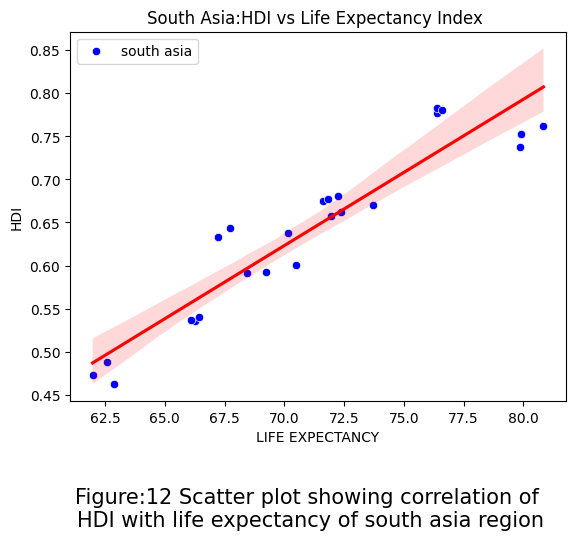

In [140]:

# plot the scartter plot
sns.scatterplot(
    data=south_asia_df, #for south asia region
    x="life_expectancy", # life expectancy on x-axis
    y="hdi", # hdi on y_axis,
    color="blue",
    label = "south asia"
)

sns.regplot(
    data=south_asia_df, #for Middle east region
    x="life_expectancy", # life expectancy on x-axis
    y="hdi", # hdi on y_axis,
    color ="red",
    scatter=False
)

# label for x-axis
plt.xlabel("LIFE EXPECTANCY")

#label for y_axis
plt.ylabel("HDI")

# a discriptive title for the graph
plt.title("South Asia:HDI vs Life Expectancy Index ")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure:12 Scatter plot showing correlation of \nHDI with life expectancy of south asia region",
    ha="center",
    fontsize=15
)

plt.savefig("Problem_3_HDI_Vs_Lifeexpec_South_Asia.png")

# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



Interpretation of the strength and direction between HDI and life expectancy relationship for South Asia region:

1.  Direction:
      
      the upward trendline indicates a positive reationship; as life expectancy improves/increases, HDI also increases
2.  Strength:
      
      The data points are loosely clustered around the trendline, suggesting Life expectancy to have a moderate positive influence on overall human development in South Asia, as measured by HDI.

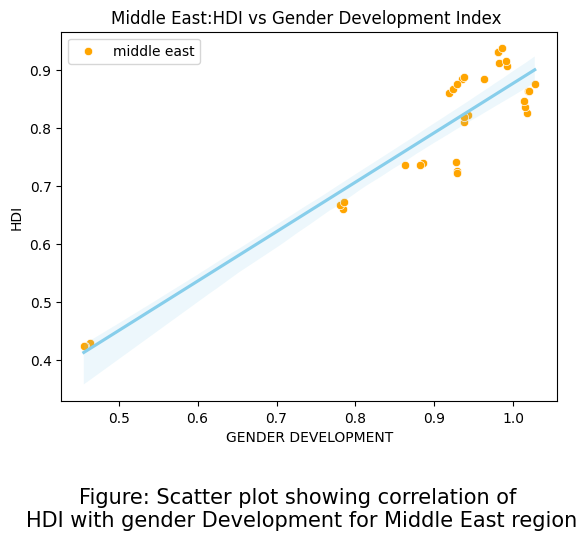

In [141]:
# plot the scartter plot
sns.scatterplot(
    data=middle_east_df, #for middle east region
    x="gender_development", # ggender development on x-axis
    y="hdi", # hdi on y_axis,
    color="orange",
    label = "middle east"
)

sns.regplot(
    data=middle_east_df, #for Middle east region
    x="gender_development", # ggender development on x-axis
    y="hdi", # hdi on y_axis,
    color ="skyblue",
    scatter=False
)

# label for x-axis
plt.xlabel("GENDER DEVELOPMENT")

#label for y_axis
plt.ylabel("HDI")

# a discriptive title for the graph
plt.title("Middle East:HDI vs Gender Development Index ")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure: Scatter plot showing correlation of \nHDI with gender Development for Middle East region",
    ha="center",
    fontsize=15
)
plt.savefig("Problem_3_HDI_Vs_GNI_Middle_East.png")

# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



Interpretation of the strength and direction between HDI and Gender Development relationship for middle east region:

1.  Direction:
      
      the upward trendline indicates a positive reationship; as gender development improves/increases, HDI also increases
2.  Strength:
      
      The data points are fairly closely clustered around the trendline, suggesting a moderate to strong positive correlation. Gender development appears to have a moderately strong positive influence on overall human development in Middle East, as measured by HDI.

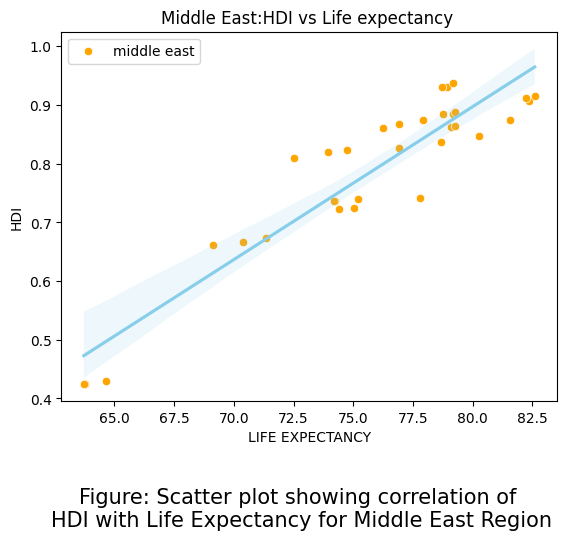

In [142]:
# plot the scartter plot
sns.scatterplot(
    data=middle_east_df, #for middle east region
    x="life_expectancy", # life expectancy on x-axis
    y="hdi", # hdi on y_axis,
    color="orange",
    label = "middle east"
)

sns.regplot(
    data=middle_east_df, #for Middle east region
    x="life_expectancy", # life expectancy on x-axis
    y="hdi", # hdi on y_axis,
    color ="skyblue",
    scatter=False
)

# label for x-axis
plt.xlabel("LIFE EXPECTANCY")

#label for y_axis
plt.ylabel("HDI")

# a discriptive title for the graph
plt.title("Middle East:HDI vs Life expectancy ")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure: Scatter plot showing correlation of \nHDI with Life Expectancy for Middle East Region",
    ha="center",
    fontsize=15
)

plt.savefig("Problem_3_HDI_Vs_LifeExpec_Middle_East.png")


# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



Interpretation of the strength and direction between HDI and Life expectancy relationship for middle east region:

1.  Direction:
      
      the upward trendline indicates a positive reationship; as gender development improves/increases, HDI also increases
2.  Strength:
      
      The data points are fairly closely clustered around the trendline, suggesting a moderately strong positive correlation between HDI and Life Expectancy which suggests that Life expectancy has a moderately strong positive influence on overall human development in Middle East, as measured by HDI.

In [143]:
# ======================================================================
# TASK 7;OUTLIER DETECTION
# ======================================================================

print("\n"+"="*70)
print("TASK 7;OUTLIER DETECTION")
print("="*70)


TASK 7;OUTLIER DETECTION


In [144]:
# Calculate outliers in HDI {"hdi"}  for south asia region
Q1_hdi = south_asia_df["hdi"].quantile(0.25)
Q3_hdi = south_asia_df["hdi"].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

# calculating lower bound outliers for south asia w.r.t HDI
hdi_lower = Q1_hdi - 1.5 * IQR_hdi
# calculating upper bound outliers for south asia w.r.t HDI
hdi_upper = Q3_hdi + 1.5 * IQR_hdi

# Calulating outlier in Gross Income PerCapital for south asia region
Q1_gni = south_asia_df["gross_inc_percap"].quantile(0.25)
Q3_gni = south_asia_df["gross_inc_percap"].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

# calculating lower bound outliers for south asia w.r.t Gross Income PerCapital
gni_lower = Q1_gni - 1.5 * IQR_gni
# calculating upper bound outliers for south asia w.r.t Gross Income PerCapital
gni_upper = Q3_gni + 1.5 * IQR_gni

# determining outliers
south_asia_df["Outlier"] = (
    (south_asia_df["hdi"] < hdi_lower) | (south_asia_df["hdi"] > hdi_upper) |
    (south_asia_df["gross_inc_percap"] < gni_lower) | (south_asia_df["gross_inc_percap"] > gni_upper)
)

# filtering out data points in south_asia_df that are outliers
outliers = south_asia_df[south_asia_df["Outlier"] == True]
# outliers[["country", "hdi", "gross_inc_percap"]].head()

# Separate normal points and outliers
normal_south_asia = south_asia_df[south_asia_df["Outlier"] == False]
outlier_south_asia = south_asia_df[south_asia_df["Outlier"] == True]


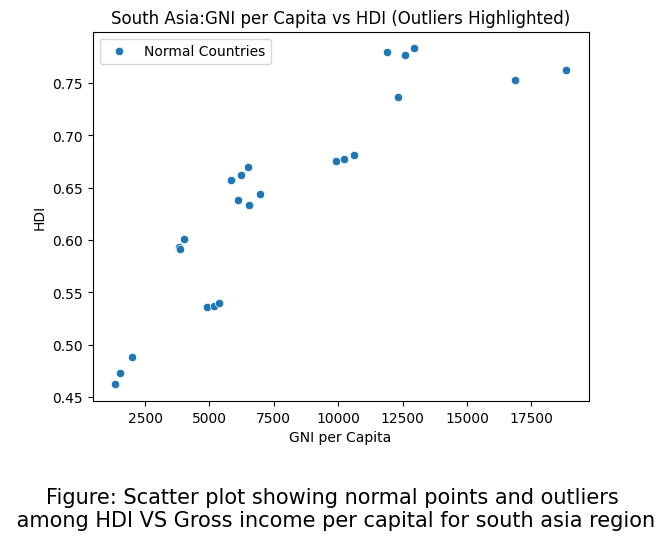

In [145]:

# plot the scartter plot
sns.scatterplot(
    data=normal_south_asia, #for normal data points
    x="gross_inc_percap", # gross_inc_percap on x-axis
    y="hdi", # hdi on y_axis
    label="Normal Countries"
)

sns.scatterplot(
    data=outlier_south_asia, # for ouliter data points
    x="gross_inc_percap", #  gross inc percap on x-axis
    y="hdi", # hdi on x-axis
    label="Outliers"
)

# label for x-axis
plt.xlabel("GNI per Capita")

#label for y_axis
plt.ylabel("HDI")

# a discriptive title for the graph
plt.title("South Asia:GNI per Capita vs HDI (Outliers Highlighted)")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure: Scatter plot showing normal points and outliers\n among HDI VS Gross income per capital for south asia region",
    ha="center",
    fontsize=15
)

plt.savefig("Problem_3_Outli.png")

# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



Above Scatter plot shows that south Asia region has no outliers in terms of HDI and GNI for the years 2020 to 2022, suggesting that the countries of this region are devloping in the same pace.

In [146]:
# Calculate outliers in HDI {"hdi"}  for Middle East region
Q1_hdi = middle_east_df["hdi"].quantile(0.25)
Q3_hdi = middle_east_df["hdi"].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

# calculating lower bound outliers for Middle East w.r.t HDI
hdi_lower = Q1_hdi - 1.5 * IQR_hdi
# calculating upper bound outliers for Middle East w.r.t HDI
hdi_upper = Q3_hdi + 1.5 * IQR_hdi

# Calulating outlier in Gross Income PerCapital for Middle East region
Q1_gni = middle_east_df["gross_inc_percap"].quantile(0.25)
Q3_gni = middle_east_df["gross_inc_percap"].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

# calculating lower bound outliers for Middle East w.r.t HDI
gni_lower = Q1_gni - 1.5 * IQR_gni
# calculating upper bound outliers for Middle East w.r.t HDI
gni_upper = Q3_gni + 1.5 * IQR_gni

# determining outliers
middle_east_df["Outlier"] = (
    (middle_east_df["hdi"] < hdi_lower) | (middle_east_df["hdi"] > hdi_upper) |
    (middle_east_df["gross_inc_percap"] < gni_lower) | (middle_east_df["gross_inc_percap"] > gni_upper)
)

# filtering out outliers
outliers = middle_east_df[middle_east_df["Outlier"] == True]

# Separate normal points and outliers
normal_middle_east = middle_east_df[middle_east_df["Outlier"] == False]
outlier_middle_east = middle_east_df[middle_east_df["Outlier"] == True]




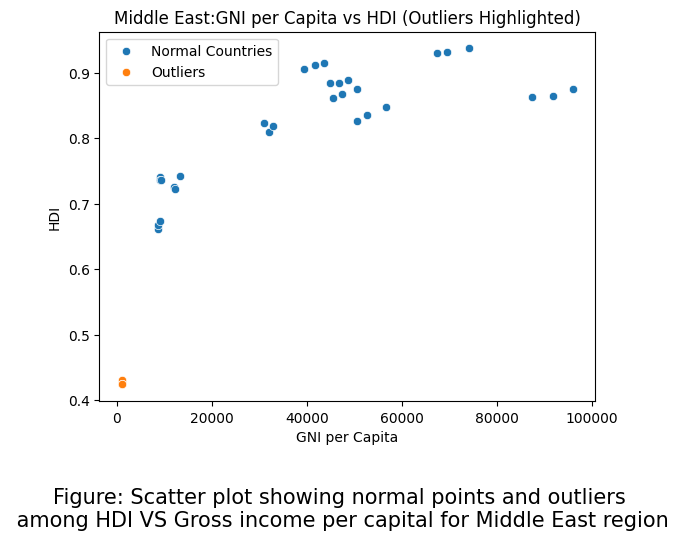

In [147]:

# plot the scartter plot
sns.scatterplot(
    data=normal_middle_east, #for normal data points
    x="gross_inc_percap", # gross_inc_percap on x-axis
    y="hdi", # hdi on y_axis
    label="Normal Countries"
)

sns.scatterplot(
    data=outlier_middle_east, # for ouliter data points
    x="gross_inc_percap", #  gross inc percap on x-axis
    y="hdi", # hdi on x-axis
    label="Outliers"
)

# label for x-axis
plt.xlabel("GNI per Capita")

#label for y_axis
plt.ylabel("HDI")

# a discriptive title for the graph
plt.title("Middle East:GNI per Capita vs HDI (Outliers Highlighted)")

# Add figure/caption below the plot
plt.figtext(
    0.5, -0.15,
    "Figure: Scatter plot showing normal points and outliers\n among HDI VS Gross income per capital for Middle East region",
    ha="center",
    fontsize=15
)

# Display a legend indicating points as normal or outliers
plt.legend()

# Rendering/ displaying the graph
plt.show()



In [148]:
data.loc[
    (data["country"] == "Hong Kong, China (SAR)") &
    (data["year"].isin([2022])),
    "hdi"
]


,hdi
2474,0.956


Above Scatter plot shows that Middle East region has few lower bound outliers in terms of HDI and GNI for the years 2020 to 2022, suggesting some countries were deviating from the regional trend of Middle East region